# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.rc('text', usetex=True)
plt.rc('font', family='arial')
plt.rcParams.update({'font.size': 14})

/home/klxh/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

### <span style="color:darkred"> SOLUTION</span>

#### <span style="color:darkblue"> $\Psi_{1,0,0}$ with uniform transition rate</span>

I started the equilibration run from the *untypical* configuration $(x_0, y_0, z_0)=(200,200,200)$ (in Bohr units) in order to illustrate the equilibration process. 

I run the simulation for 100 time steps (in the sense of the Markov chain; I do not mean time in the physical sense). Then I restarted it from the last configuration reached. In total I equilibrated the system for 3000 time steps.

On the y axis is shown the difference between the Monte Carlo estimate of the expected position and the theoretical value.

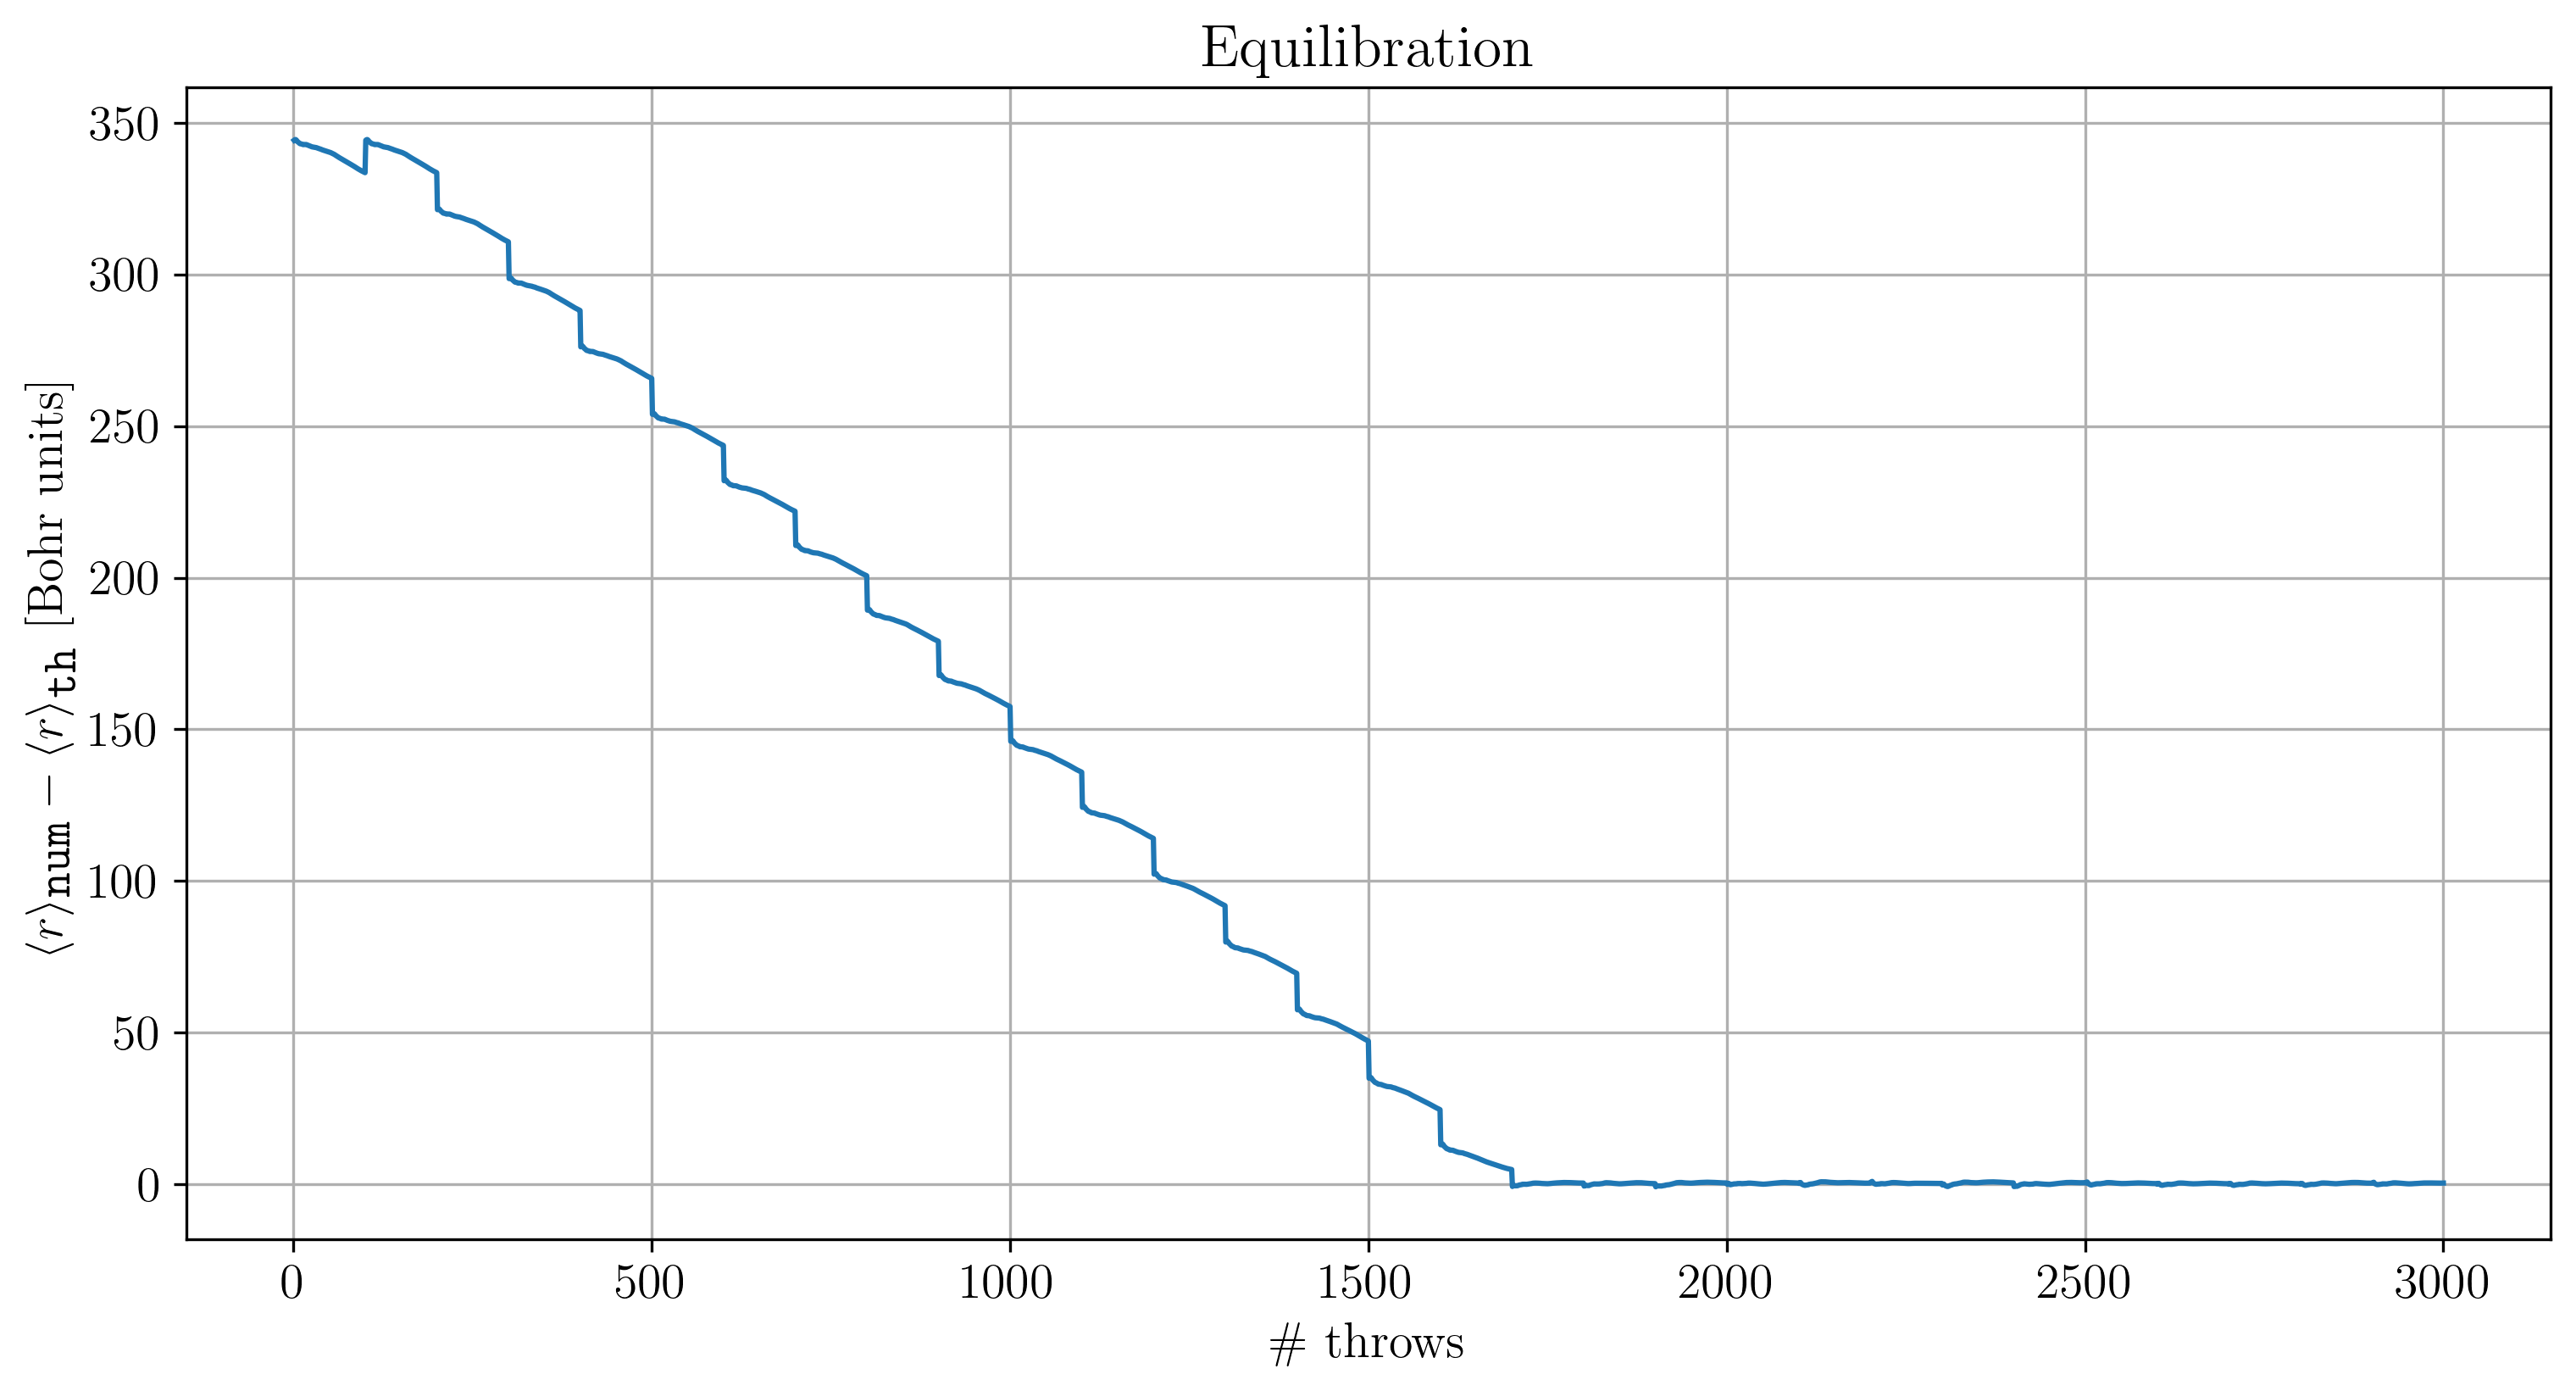

In [2]:
plt.subplots(1,1, figsize=(12,6), dpi=300)
f = np.loadtxt("./uniform/100/data/equilibration100.dat", usecols=1, unpack="true")
x = np.arange(1, len(f)+1)
plt.plot(x,f-1.5)
plt.xlabel("\# throws")
plt.ylabel("$\langle r \\rangle_{\\texttt{num}}  - \langle r\\rangle_{\\texttt{th}} $ [Bohr units]")
plt.title("Equilibration")

plt.grid(True)
plt.show()

In the plot below is shown the result for the simulation proper after equilibration, with error bars at level 3σ.

I used 100 blocks and 10^6 throws, therefore 10^4 throws per block.
With a uniform transition rate with step of length 2.5 Bohr units I obtained an acceptance rate of 0.492501. The starting point of the simulation was the last configuration from the equilibration run.

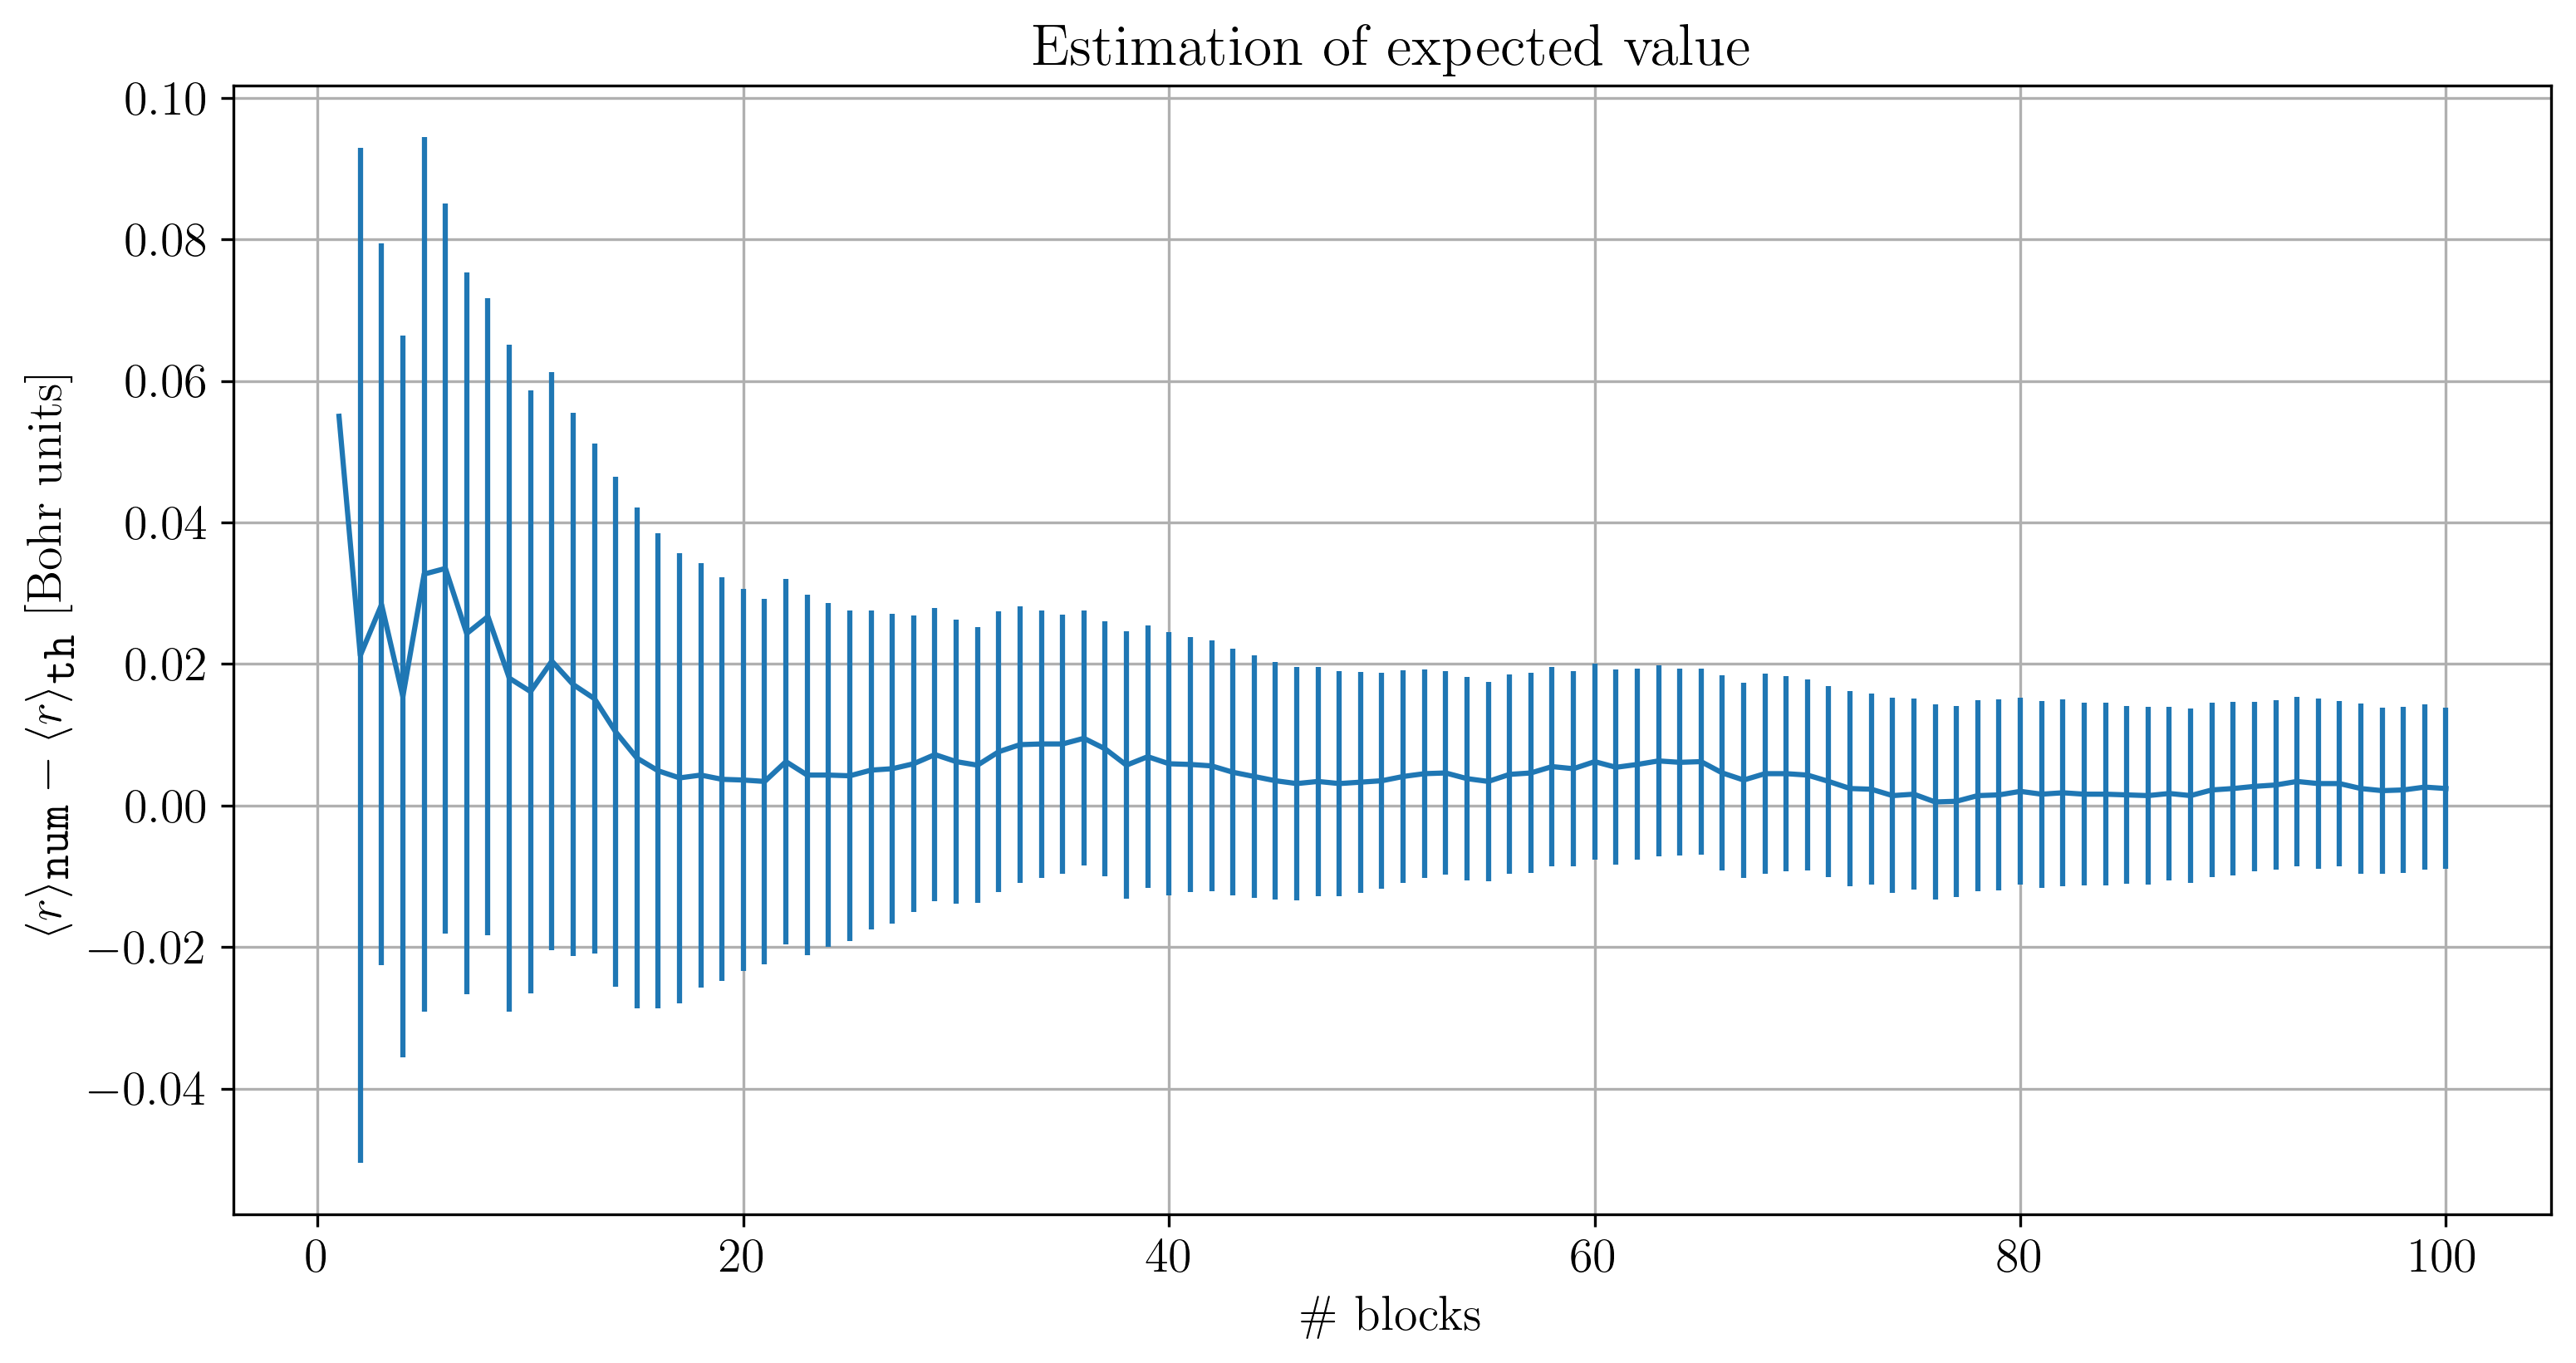

In [3]:
plt.subplots(1,1, figsize=(12,6), dpi=300)
x, f, err = np.loadtxt("./uniform/100/data/uniform100.dat", usecols=(0,1,2), unpack="true")
plt.errorbar(x,f-1.5, yerr=3*err)
plt.xlabel("\# blocks")
plt.ylabel("$\langle r \\rangle_{\\texttt{num}}  - \langle r\\rangle_{\\texttt{th}} $ [Bohr units]")
plt.title("Estimation of expected value")

plt.grid(True)
plt.show()

The number of throws per block is well above the correlation length of the configurations. To estimate the correlation length, it could be recalled that the statistical error should scale as $\sim N^{-\frac{1}{2}}$. Therefore I repeated the simulation several times for 1000 blocks, changing the number of throws per block from 1 to 1000. Then I plotted the final statistical error for each of these runs as a function of the number of throws per block and I fitted it with the expected scaling law $\sim N^{-\frac{1}{2}}$, using for the fit only the data from 500 throws per block to 1000 throws per block. If there is a deviation from the expected behaviour, it should be before. It is indeed the case that 4 fits with different ranges of number of throws coincide, as is seen from the plot below.

It can be observed that there is indeed an underestimation of the error for up to 200 number of throws per block, which is due to not having accounted for the correlation between the variables.

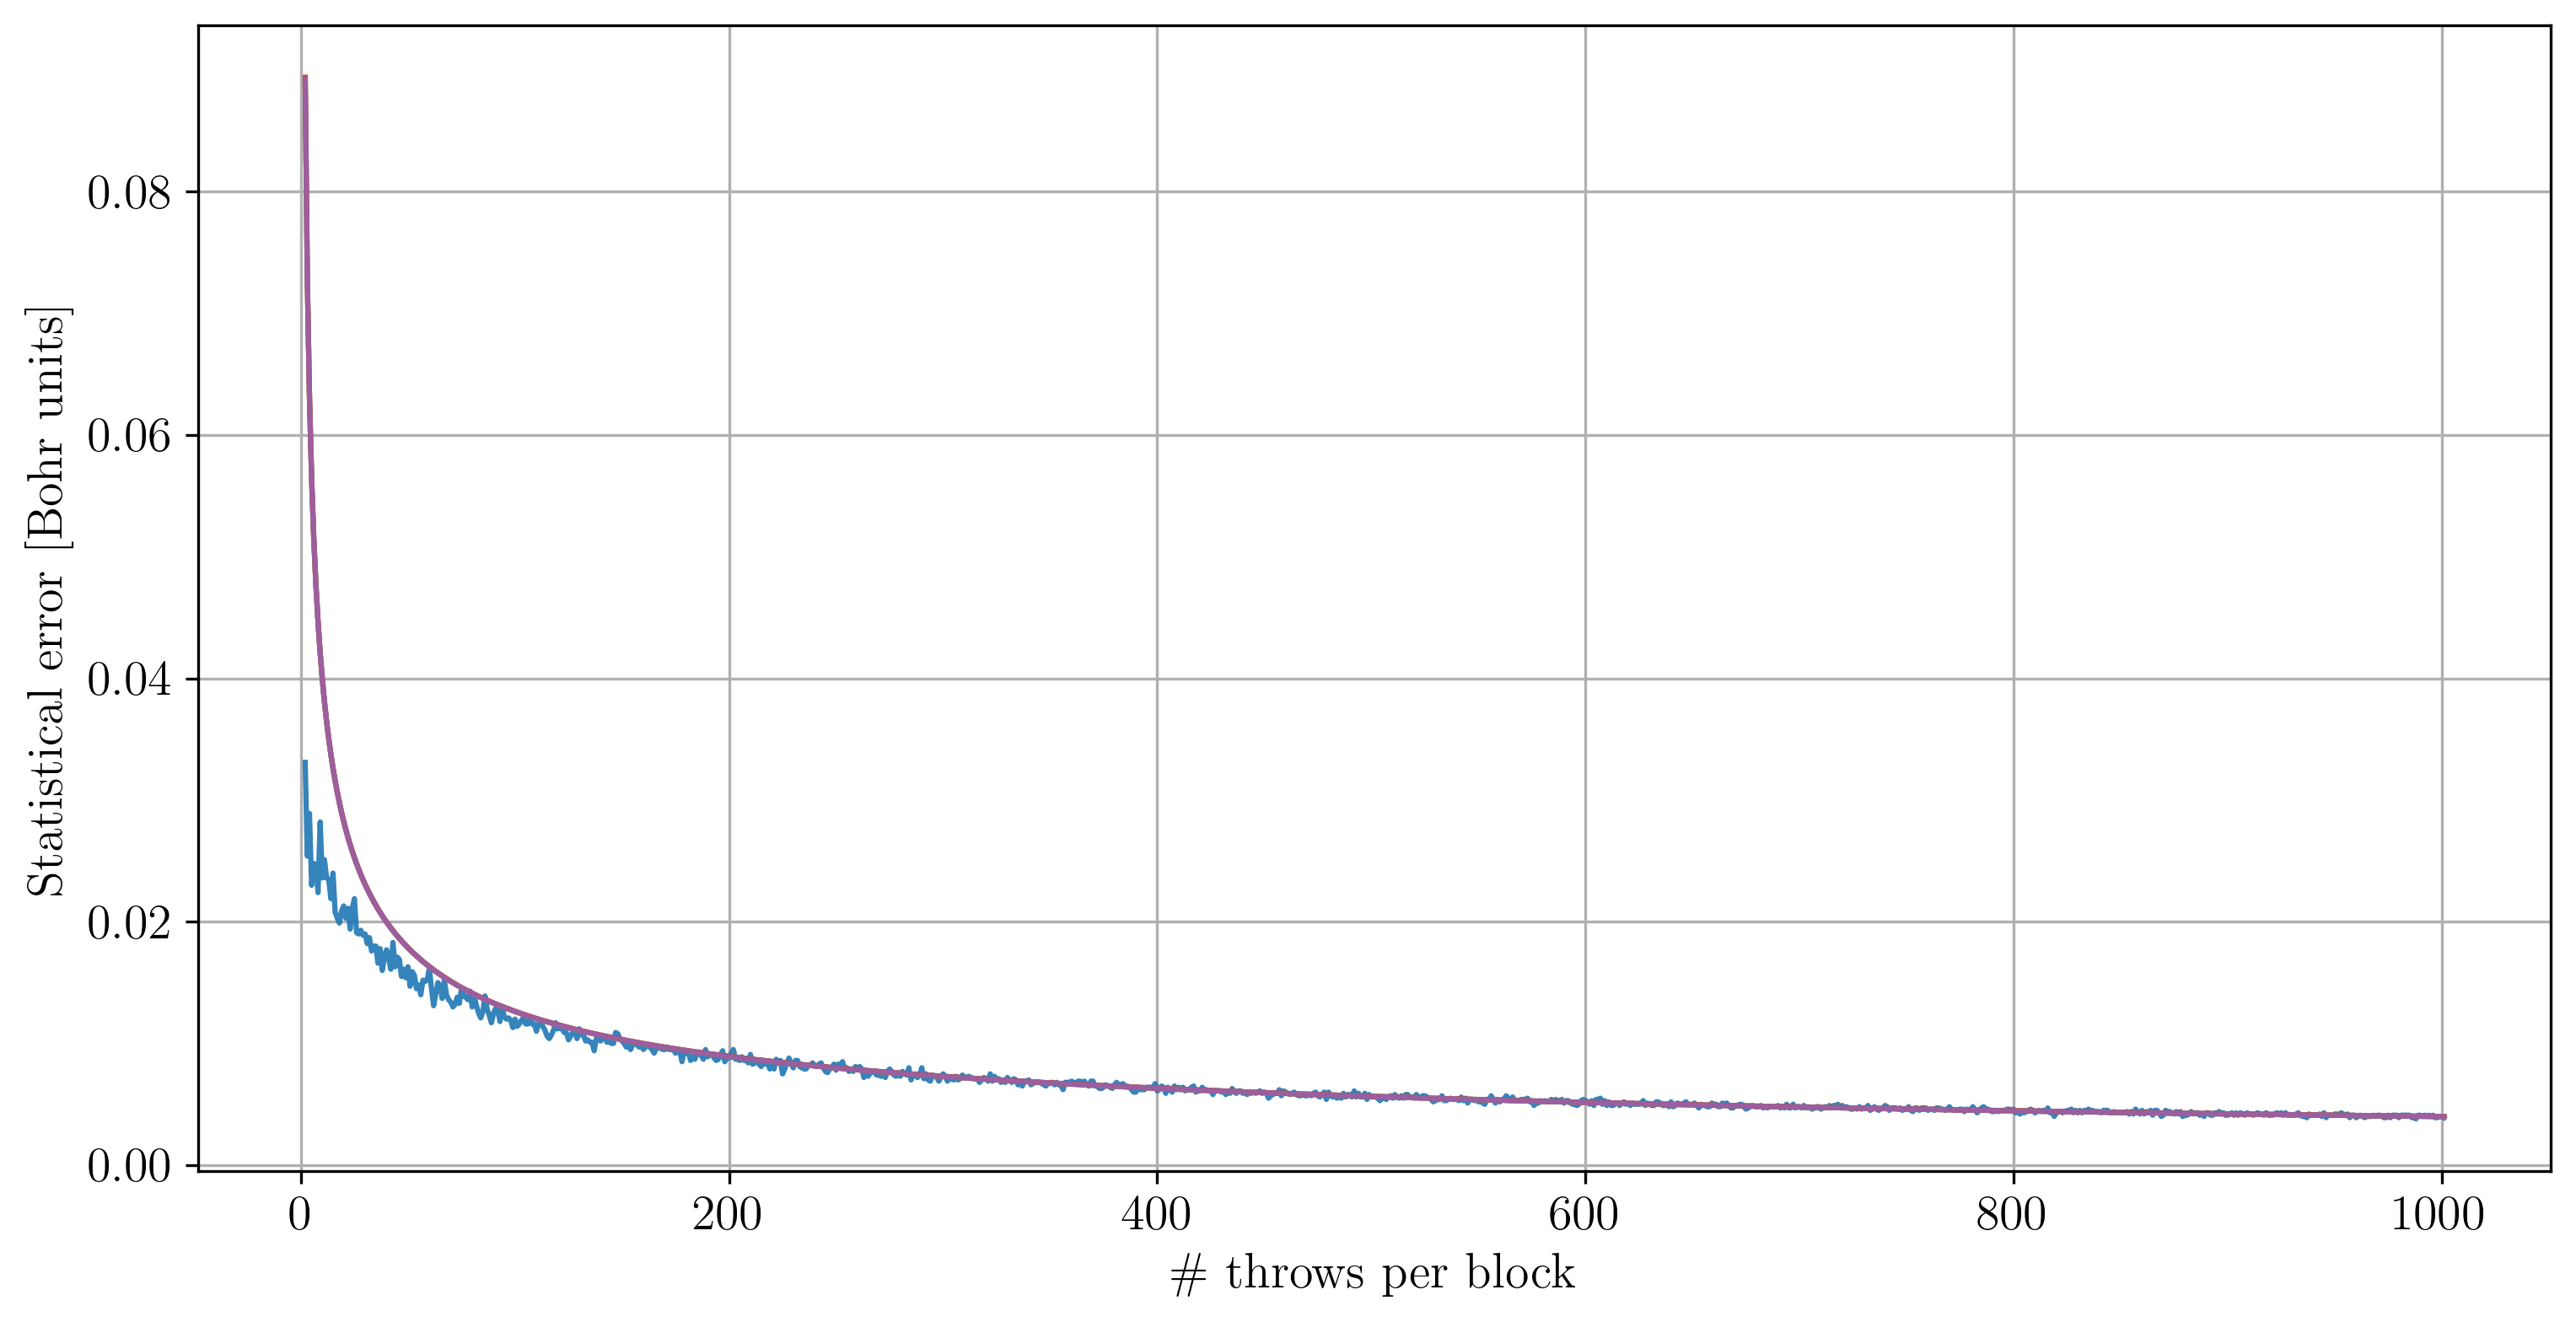

In [4]:
def f(x,a):  # Expected asymptotic behaviour of the error of the mean
    return a / x**.5

plt.subplots(1,1, figsize=(12,6), dpi=300)
x, r = np.loadtxt("./uniform/100/data/correlation.dat", usecols=(0,1), unpack="true")
plt.plot(x,r, alpha=0.9)

X1 = np.arange(500,1000) # Range for fit
X2 = np.arange(600,1000) # Range for fit
X3 = np.arange(700,1000) # Range for fit
X4 = np.arange(800,1000) # Range for fit
Y1 = np.array([r[i] for i in X1])
Y2 = np.array([r[i] for i in X2])
Y3 = np.array([r[i] for i in X3])
Y4 = np.array([r[i] for i in X4])
p_opt1, p_cov1 = curve_fit(f, X1, Y1)
p_opt2, p_cov2 = curve_fit(f, X2, Y2)
p_opt3, p_cov3 = curve_fit(f, X3, Y3)
p_opt4, p_cov4 = curve_fit(f, X4, Y4)
y_fit1 = f(x,p_opt1[0])
y_fit2 = f(x,p_opt2[0])
y_fit3 = f(x,p_opt3[0])
y_fit4 = f(x,p_opt4[0])
plt.plot(x,y_fit1, alpha=0.8) # plotting fitted function
plt.plot(x,y_fit2, alpha=0.8)
plt.plot(x,y_fit3, alpha=0.8)
plt.plot(x,y_fit4, alpha=0.8)

plt.xlabel("\# throws per block")
plt.ylabel("Statistical error [Bohr units]")

plt.grid(True)
plt.show()

Finally, in the cell below we can see the sampled configurations.

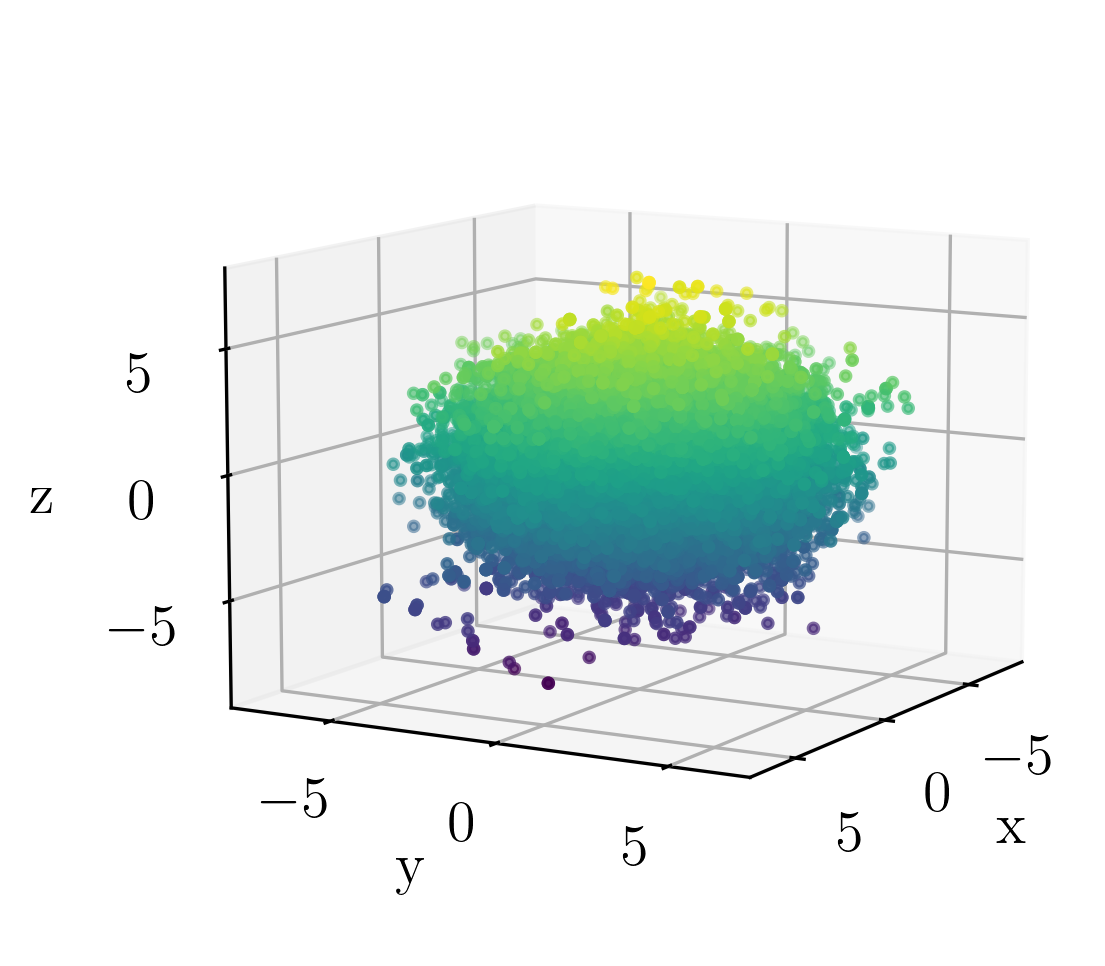

In [5]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
X, Y, Z = np.loadtxt("./uniform/100/data/uniform100.xyz", usecols=(0,1,2), unpack="true")
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

#### <span style="color:darkblue"> $\Psi_{2,1,0}$ with uniform transition rate</span>

I repeated what I did for $\Psi_{100}$. Now I took a width of the transition probability equal to 6 and I got an acceptance rate of 0.497458.

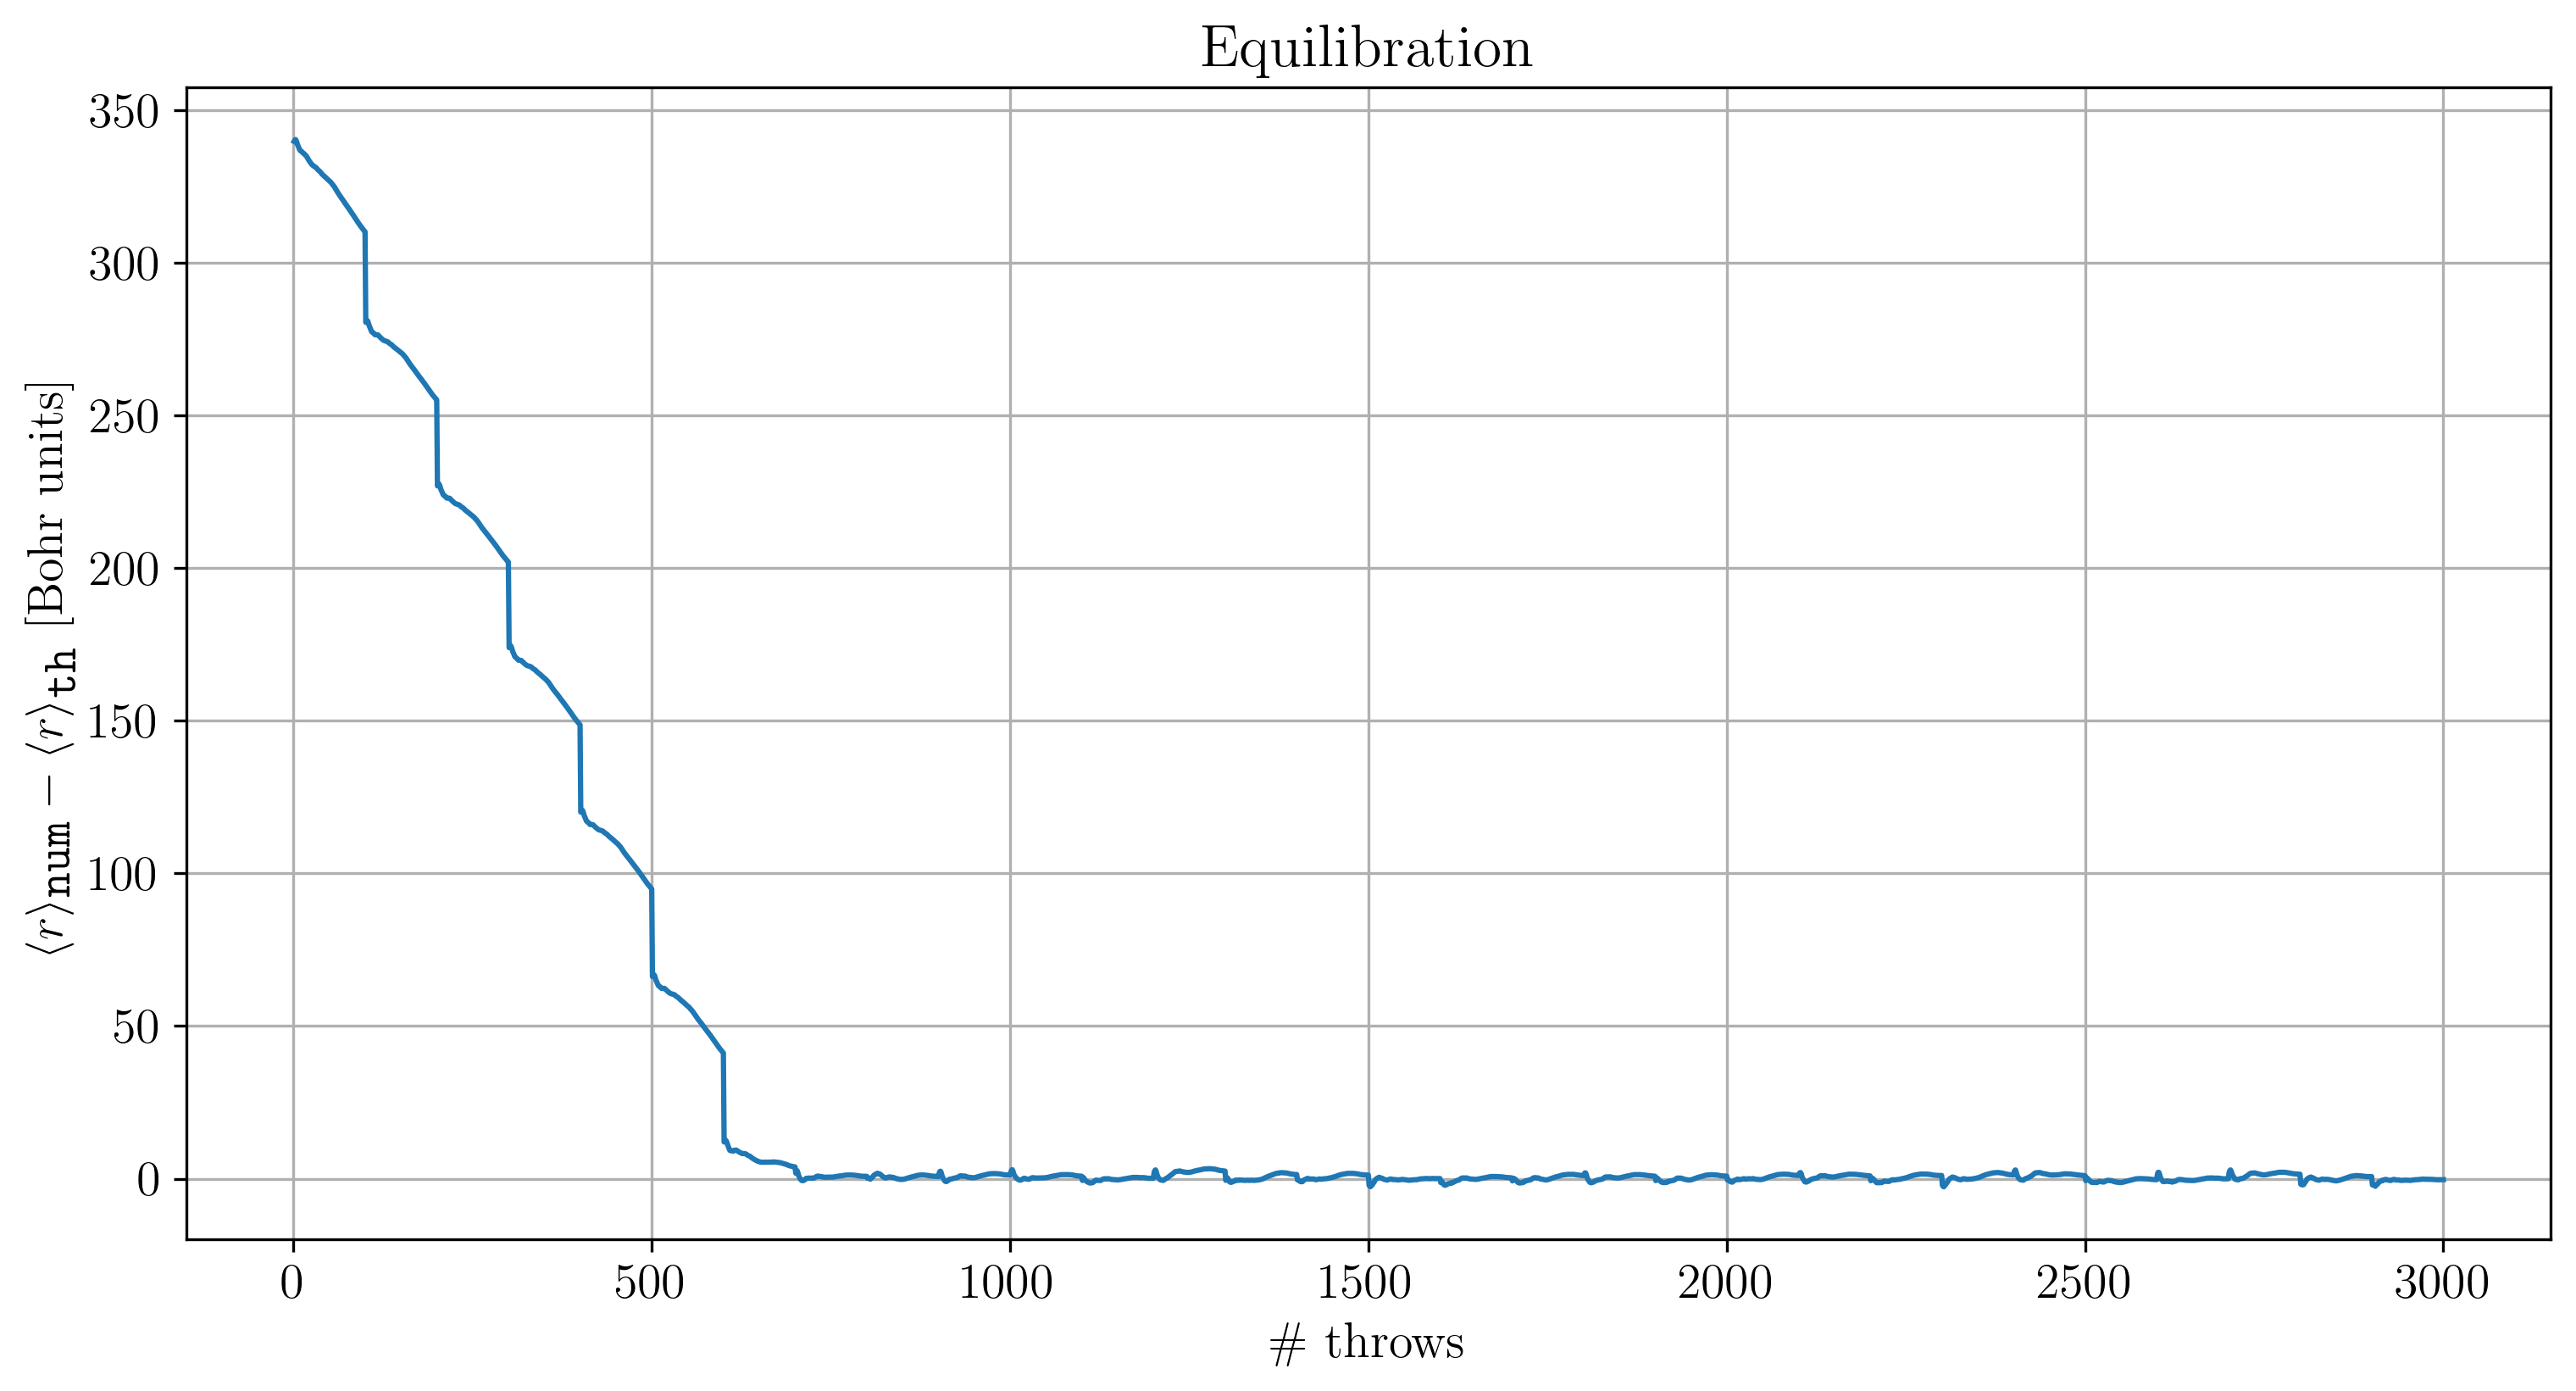

In [6]:
plt.subplots(1,1, figsize=(12,6), dpi=300)
f = np.loadtxt("./uniform/210/data/equilibration210.dat", usecols=1, unpack="true")
x = np.arange(1, len(f)+1)
plt.plot(x,f-5)
plt.xlabel("\# throws")
plt.ylabel("$\langle r \\rangle_{\\texttt{num}}  - \langle r\\rangle_{\\texttt{th}} $ [Bohr units]")
plt.title("Equilibration")

plt.grid(True)
plt.show()

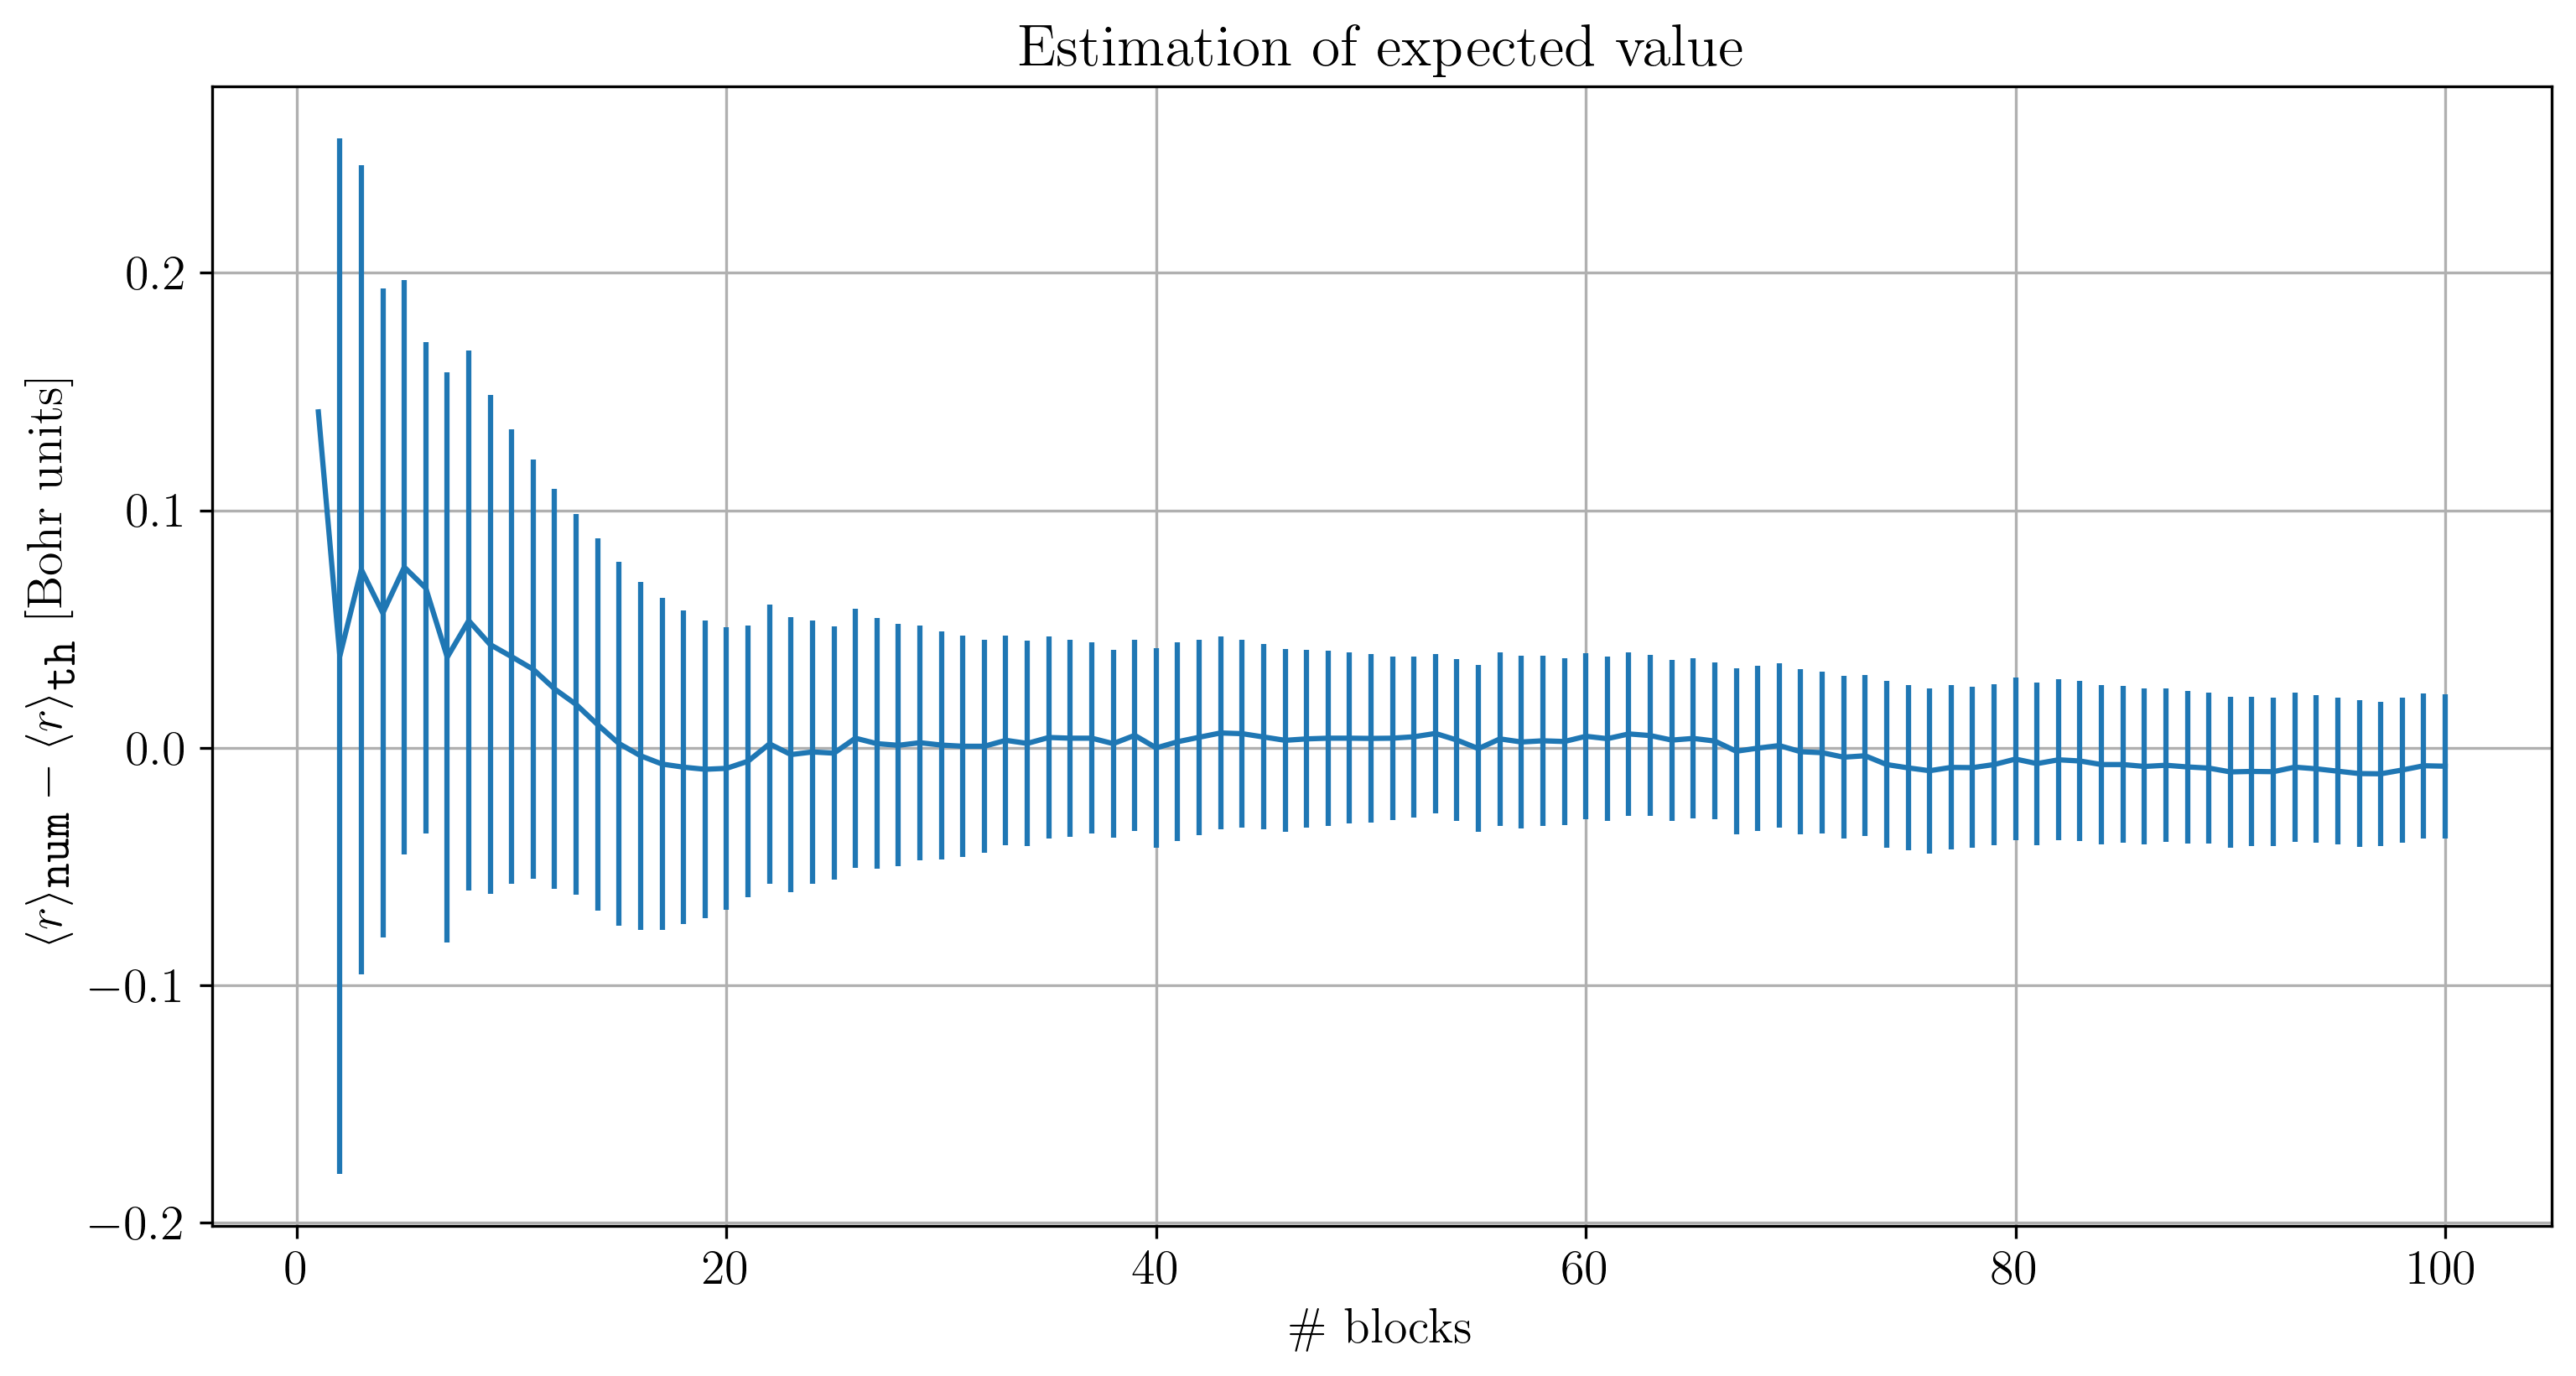

In [7]:
plt.subplots(1,1, figsize=(12,6), dpi=300)
x, f, err = np.loadtxt("./uniform/210/data/uniform210.dat", usecols=(0,1,2), unpack="true")
plt.errorbar(x,f-5, yerr=3*err)
plt.xlabel("\# blocks")
plt.ylabel("$\langle r \\rangle_{\\texttt{num}}  - \langle r\\rangle_{\\texttt{th}} $ [Bohr units]")
plt.title("Estimation of expected value")

plt.grid(True)
plt.show()

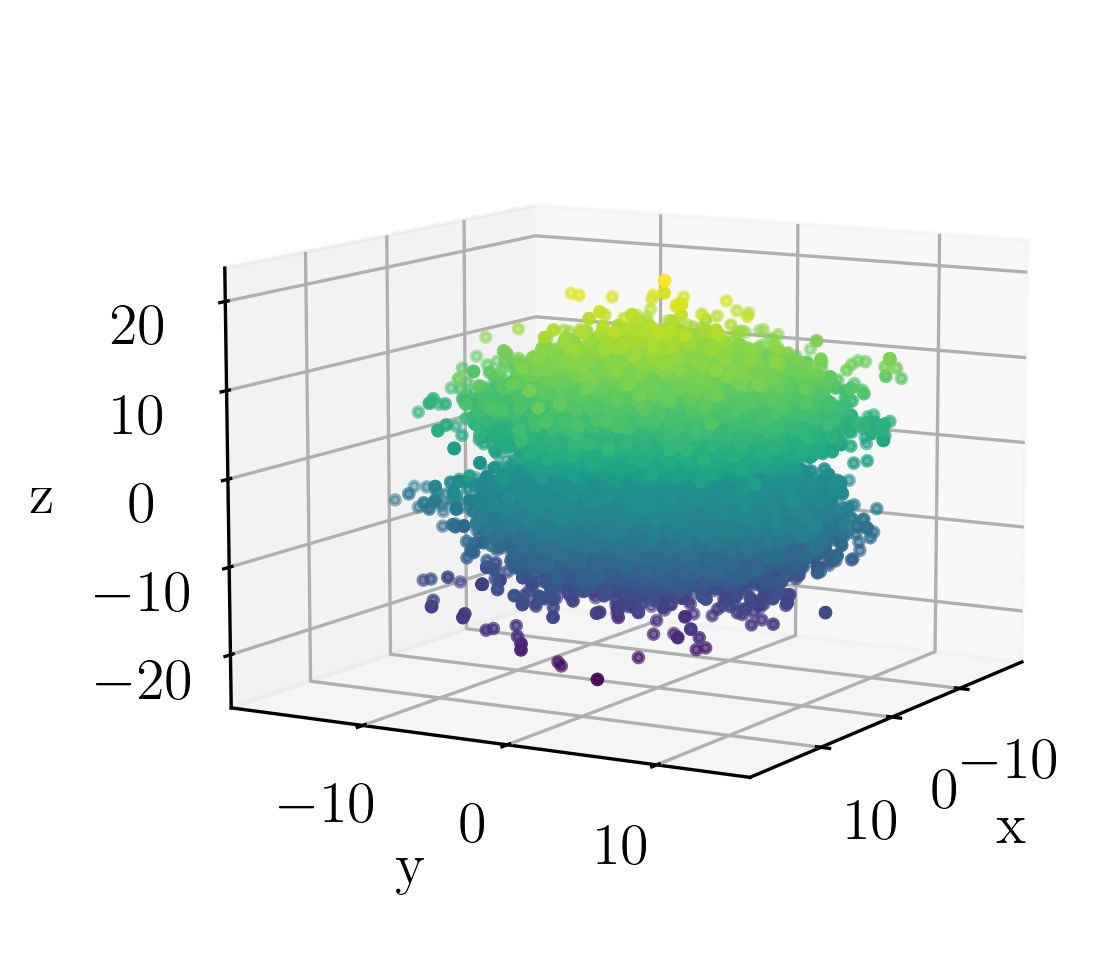

In [8]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
X, Y, Z = np.loadtxt("./uniform/210/data/uniform210.xyz", usecols=(0,1,2), unpack="true")
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

#### <span style="color:darkblue"> $\Psi_{1,0,0}$ with gaussian transition rate</span>
Gaussian with std dev 0.85.
Acceptance rate = 0.51891.

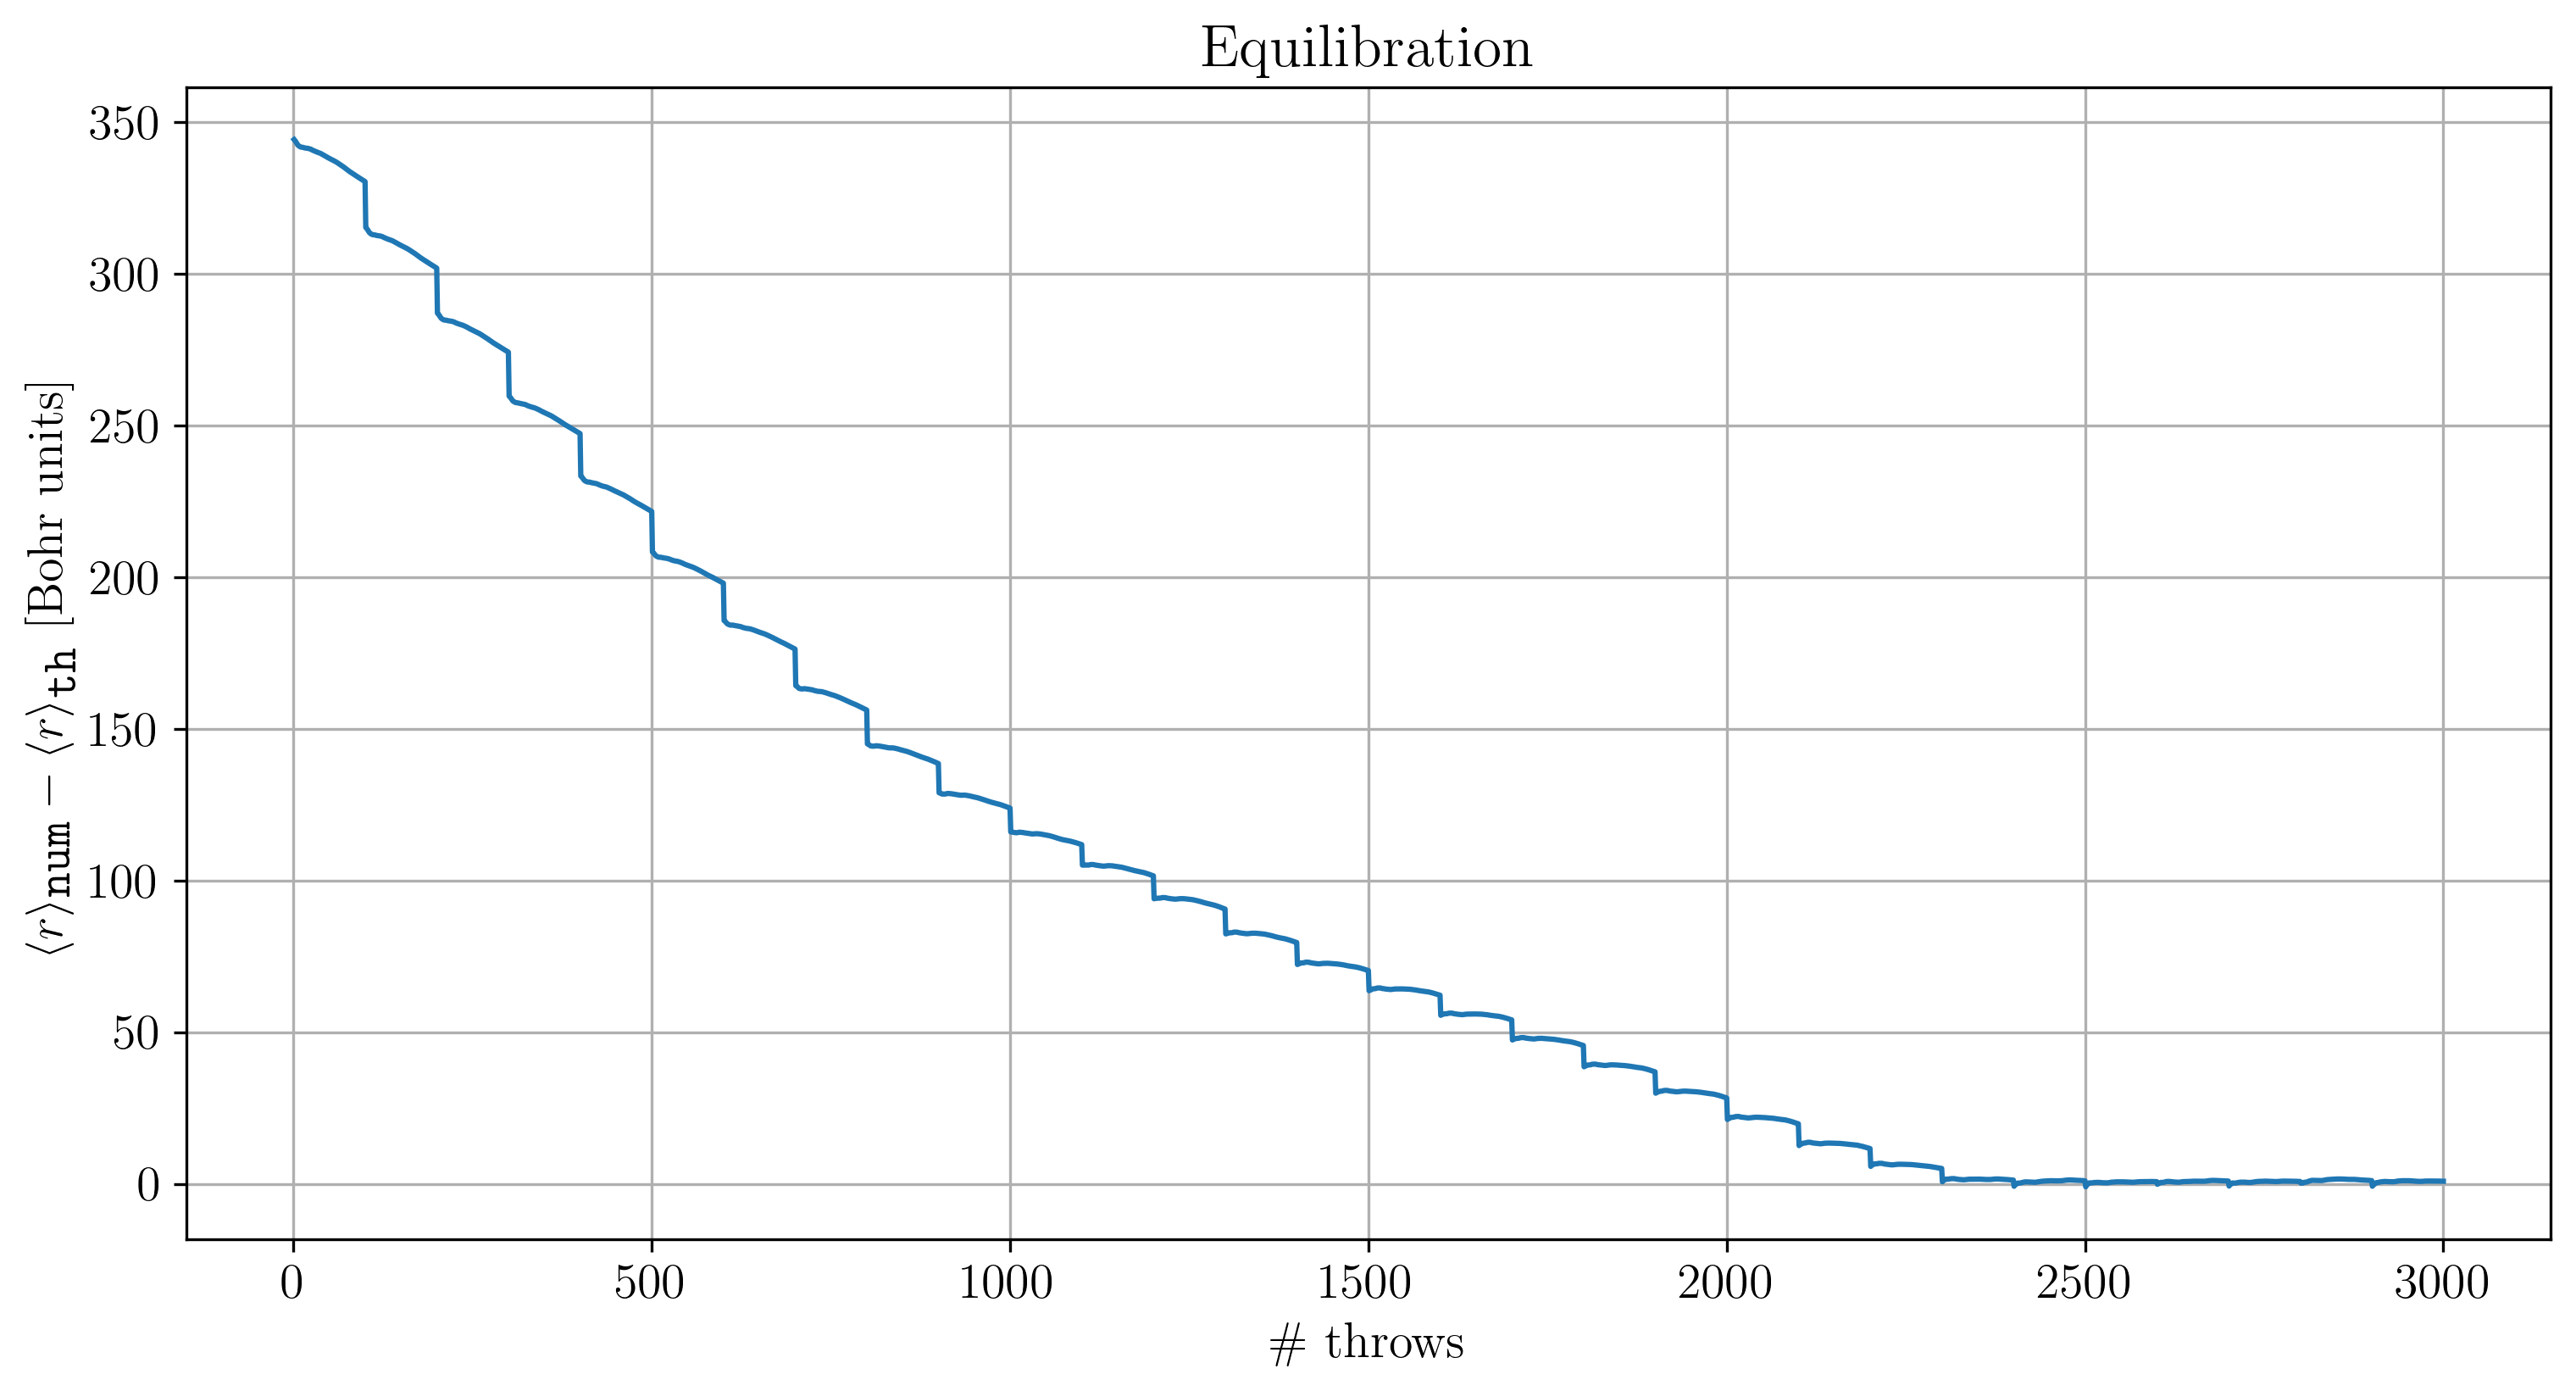

In [9]:
plt.subplots(1,1, figsize=(12,6), dpi=300)
f = np.loadtxt("./gaussian/100/data/equilibration100.dat", usecols=1, unpack="true")
x = np.arange(1, len(f)+1)
plt.plot(x,f-1.5)
plt.xlabel("\# throws")
plt.ylabel("$\langle r \\rangle_{\\texttt{num}}  - \langle r\\rangle_{\\texttt{th}} $ [Bohr units]")
plt.title("Equilibration")

plt.grid(True)
plt.show()

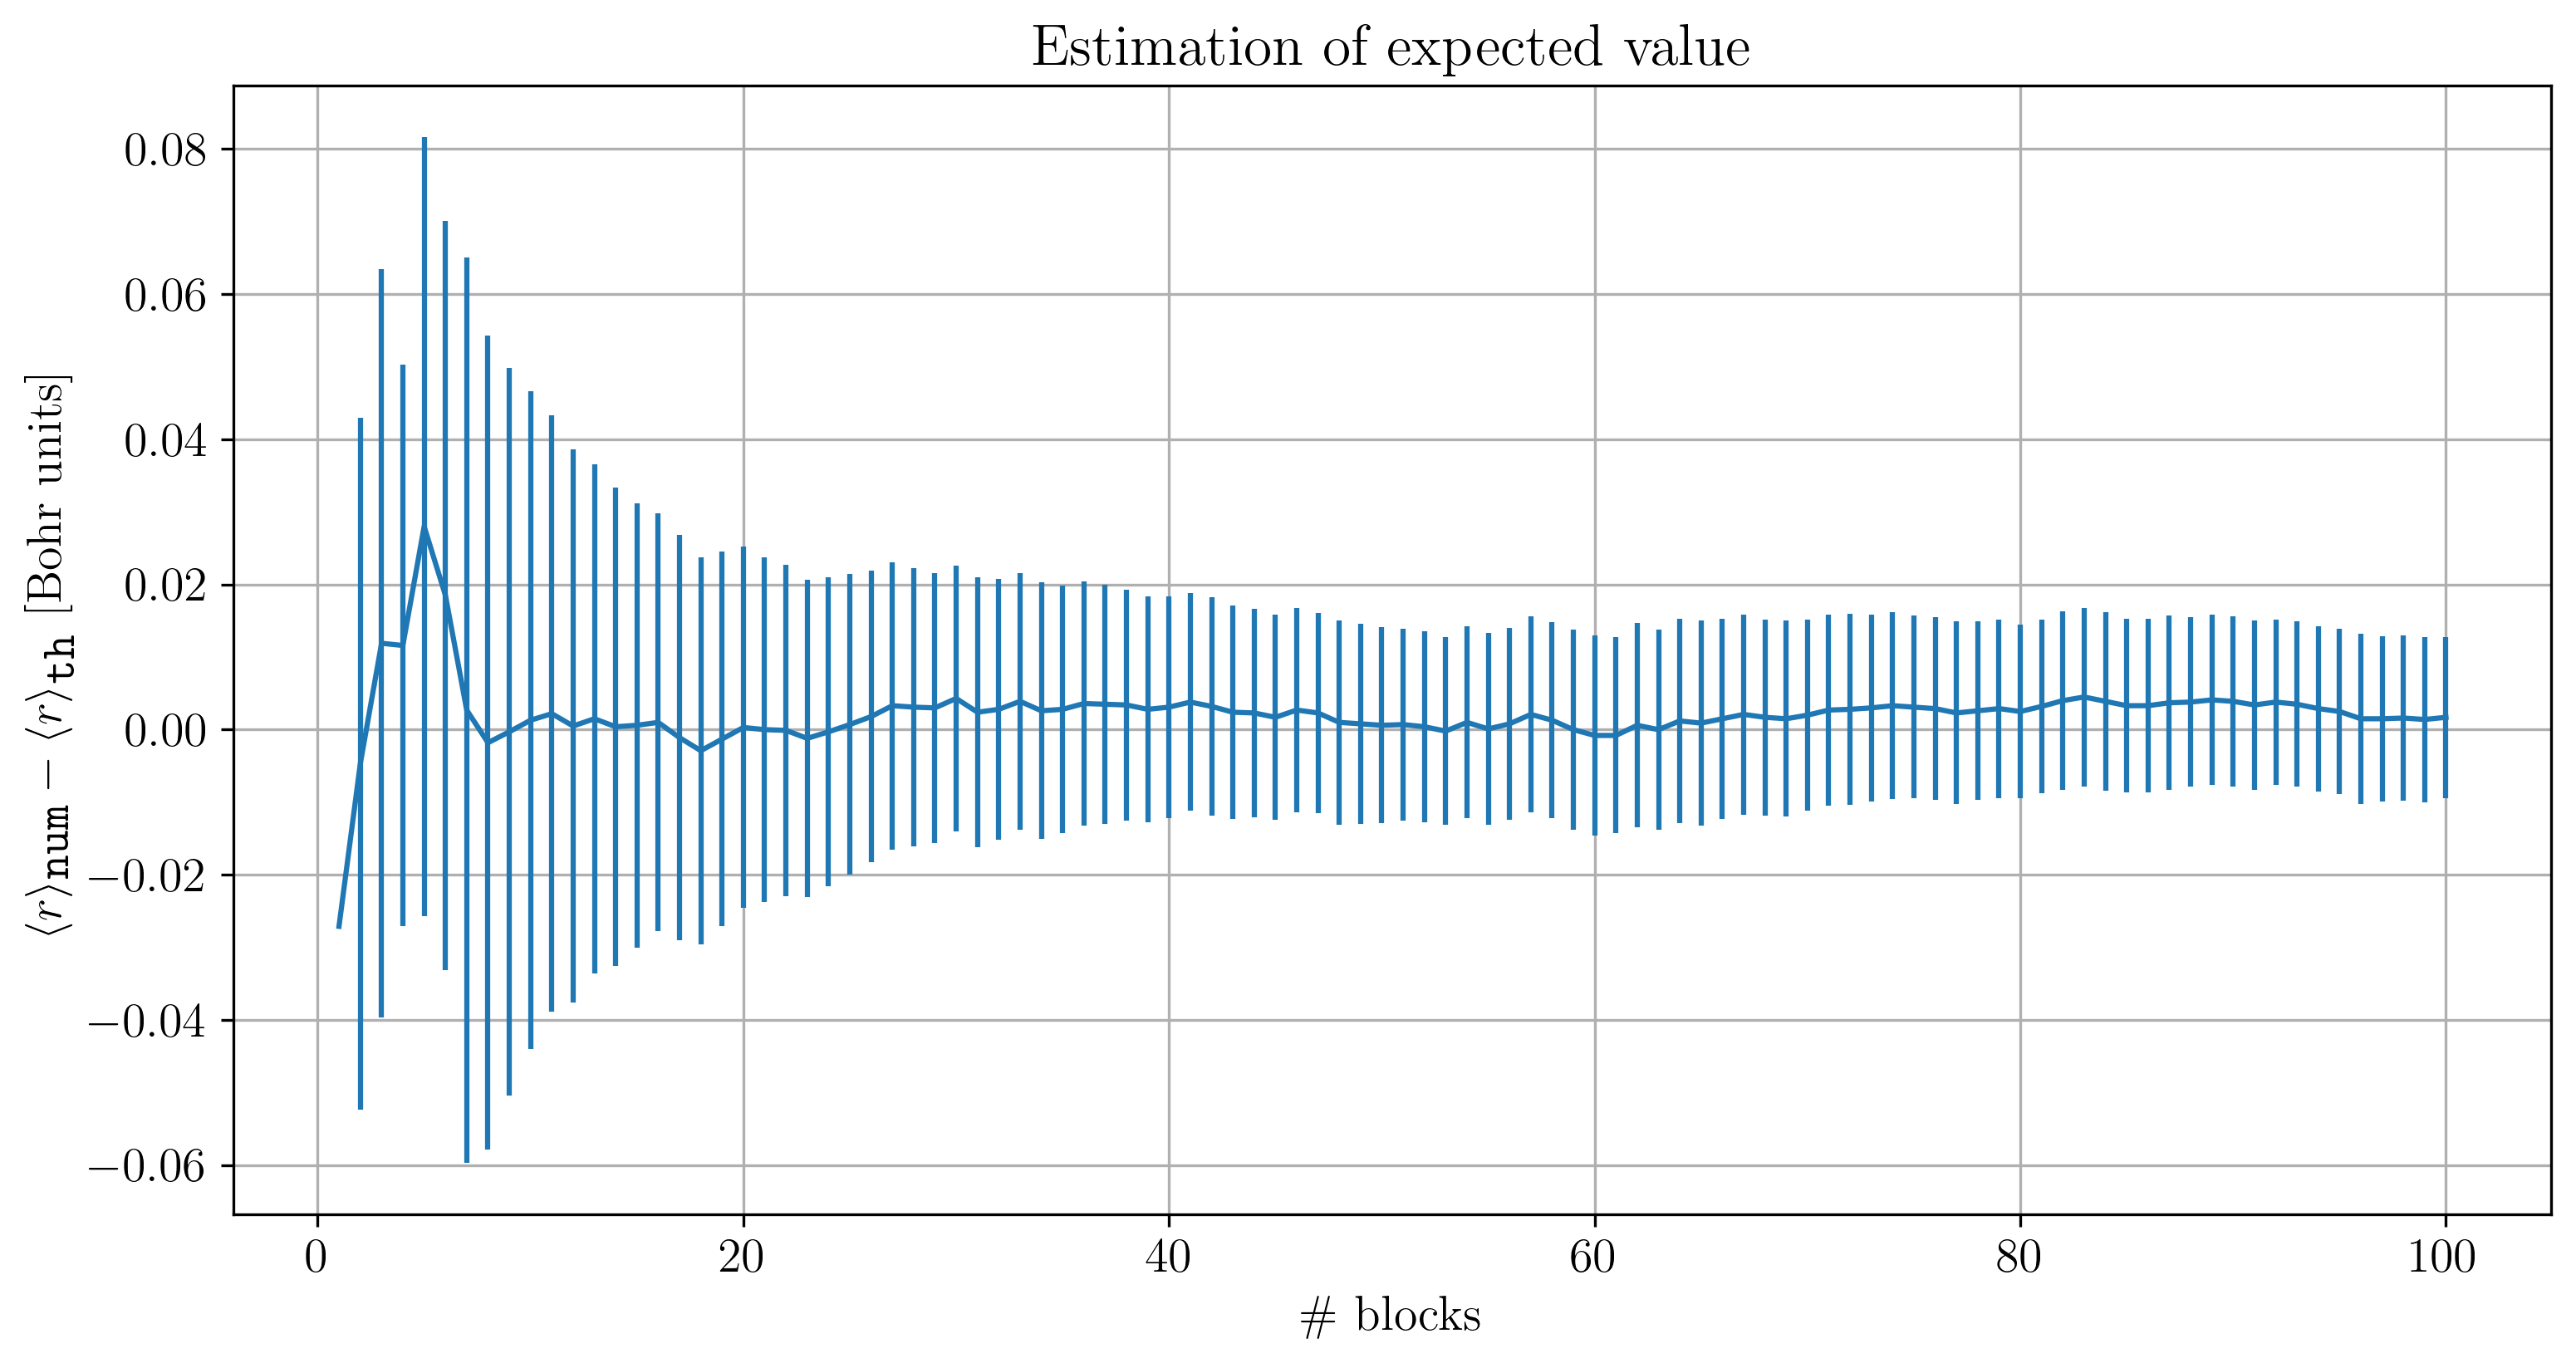

In [10]:
plt.subplots(1,1, figsize=(12,6), dpi=300)
x, f, err = np.loadtxt("./gaussian/100/data/gaussian100.dat", usecols=(0,1,2), unpack="true")
plt.errorbar(x,f-1.5, yerr=3*err)
plt.xlabel("\# blocks")
plt.ylabel("$\langle r \\rangle_{\\texttt{num}}  - \langle r\\rangle_{\\texttt{th}} $ [Bohr units]")
plt.title("Estimation of expected value")

plt.grid(True)
plt.show()

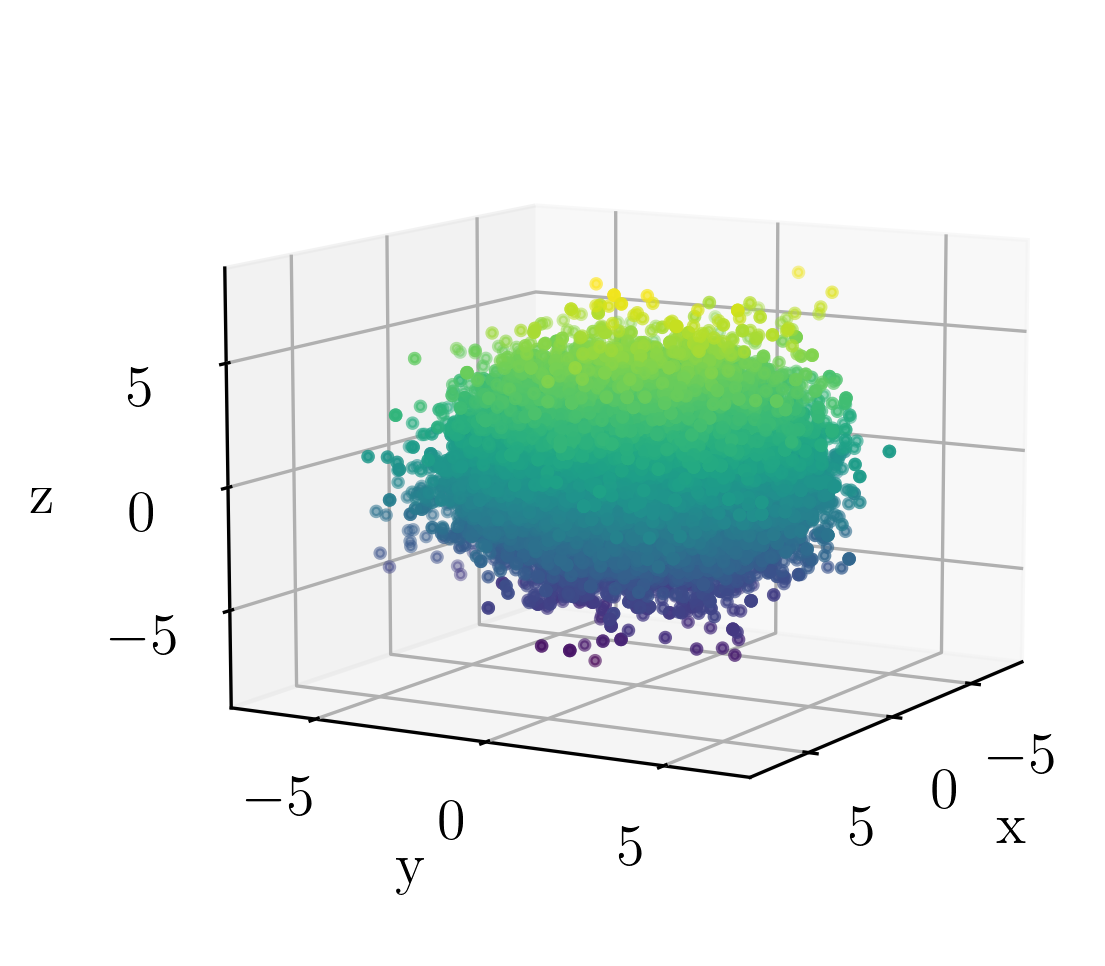

In [11]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
X, Y, Z = np.loadtxt("./gaussian/100/data/gaussian100.xyz", usecols=(0,1,2), unpack="true")
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

#### <span style="color:darkblue"> $\Psi_{2,1,0}$ with gaussian transition rate</span>
Gaussian with std dev 1.38.
Acceptance rate = 0.495895.

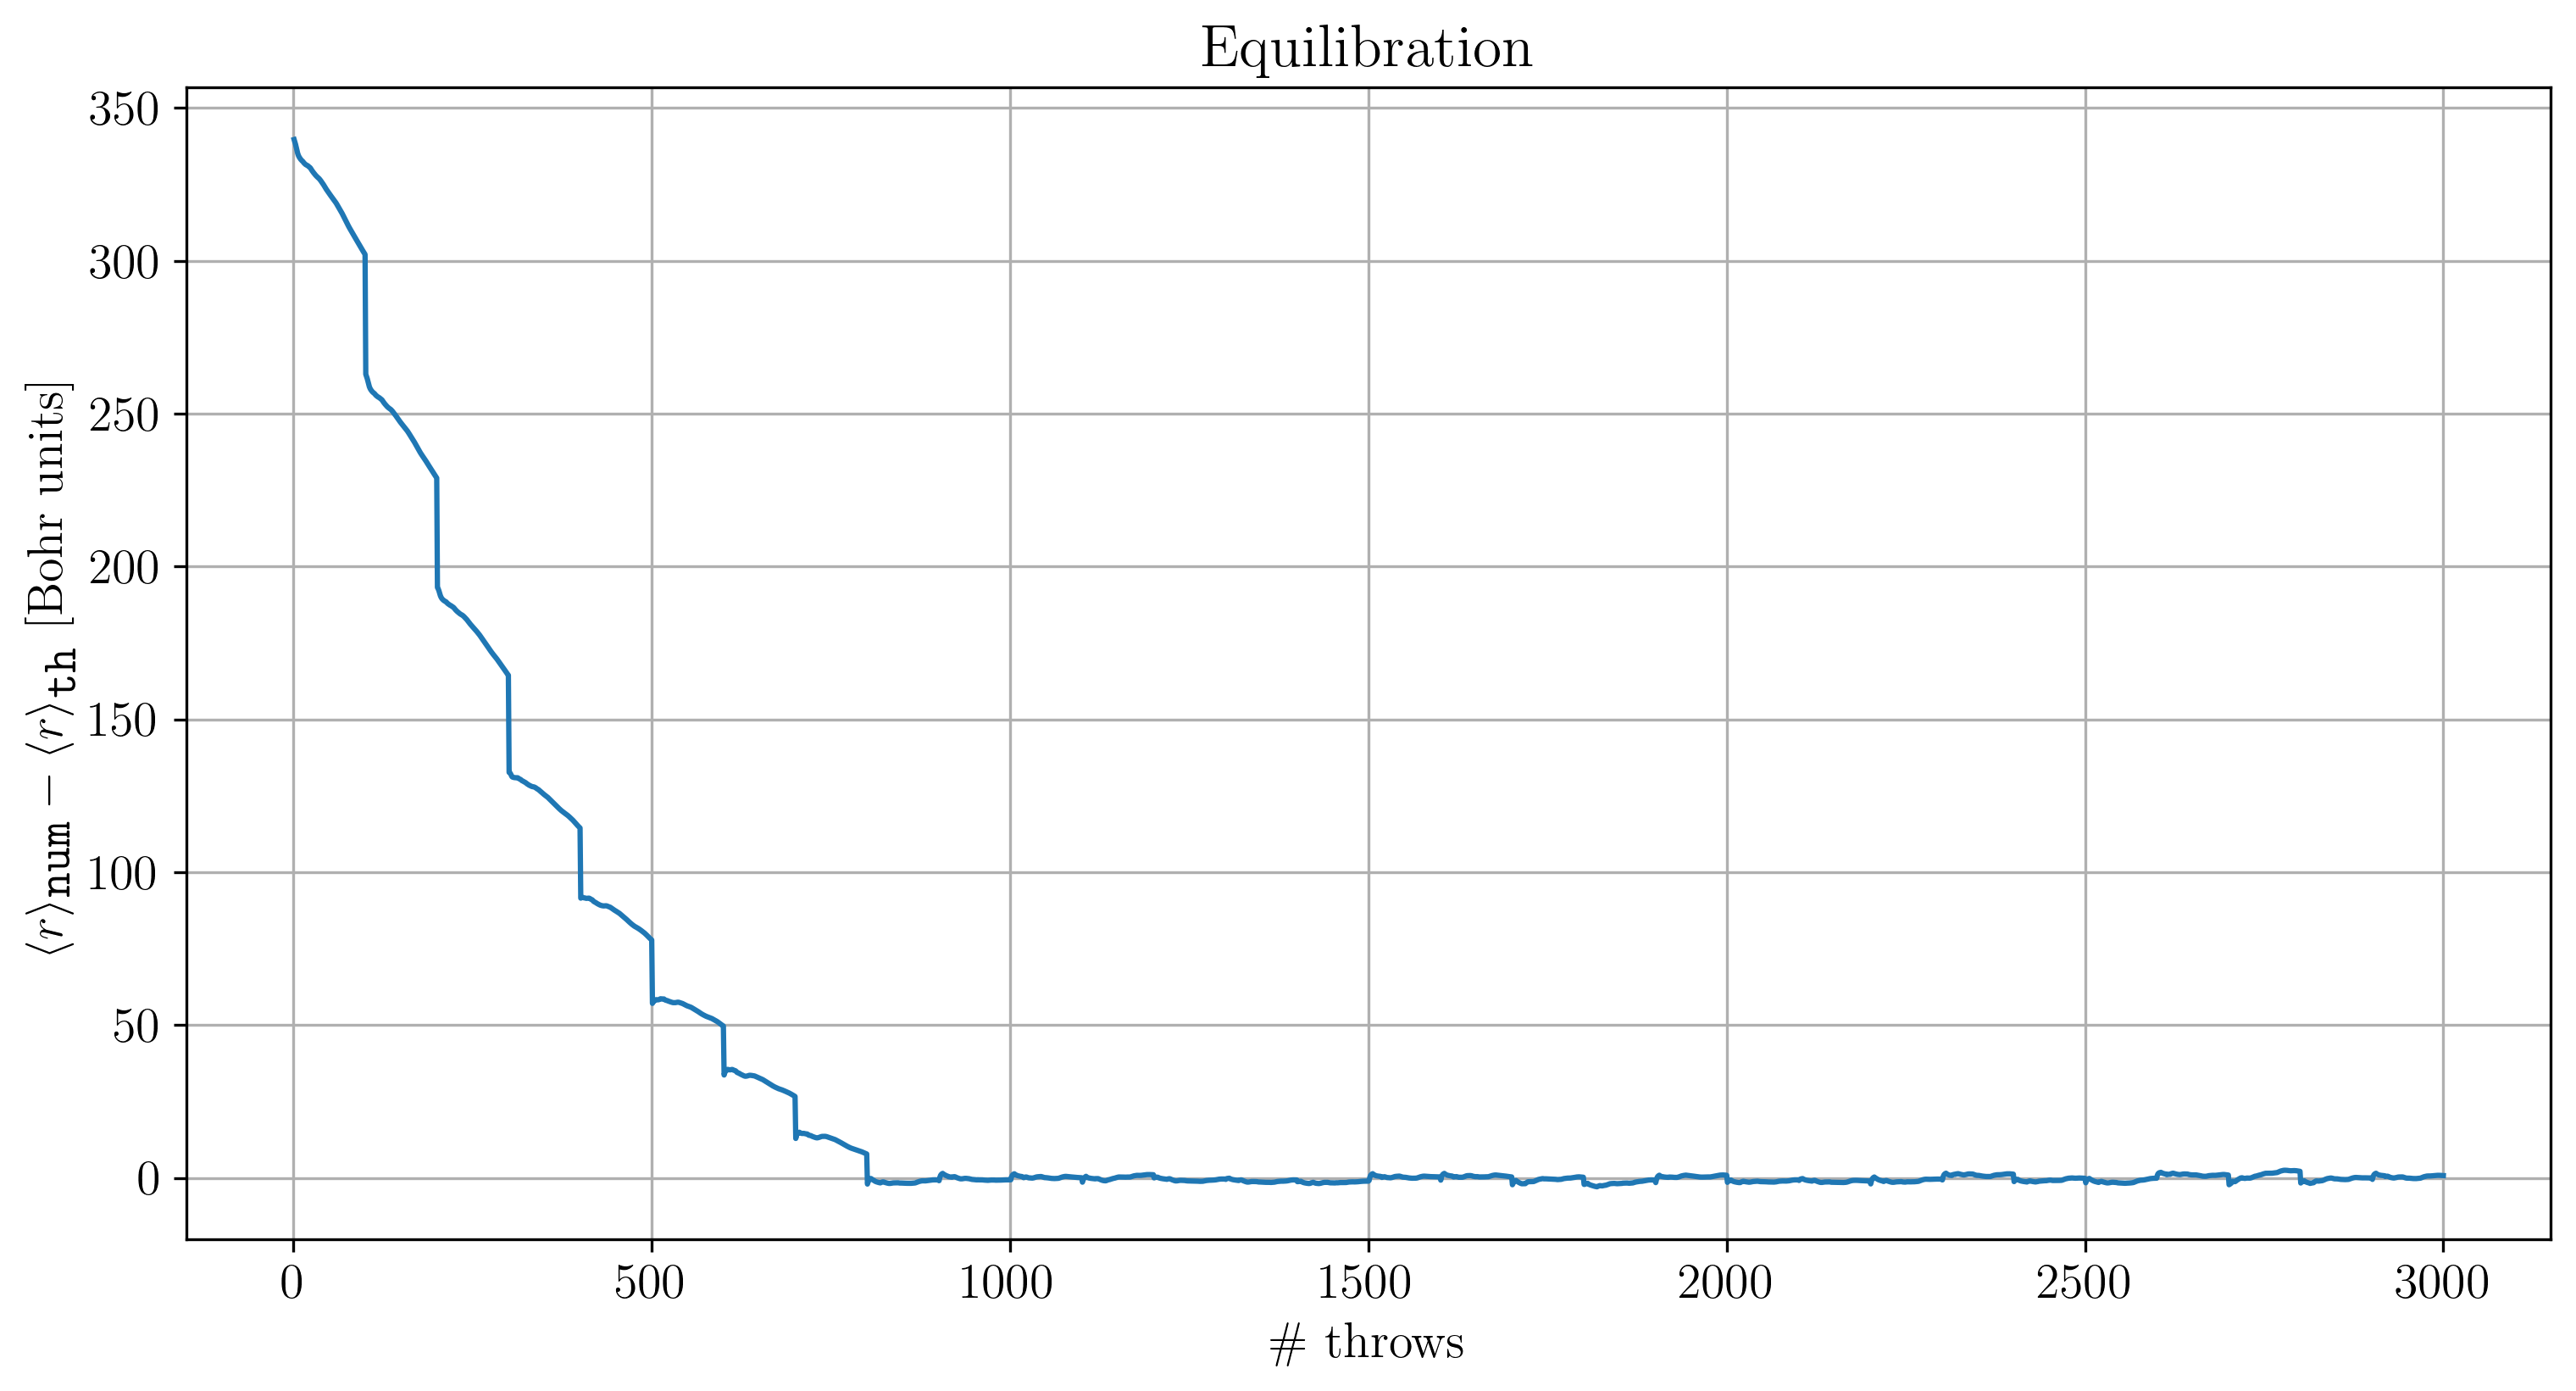

In [12]:
plt.subplots(1,1, figsize=(12,6), dpi=300)
f = np.loadtxt("./gaussian/210/data/equilibration210.dat", usecols=1, unpack="true")
x = np.arange(1, len(f)+1)
plt.plot(x,f-5)
plt.xlabel("\# throws")
plt.ylabel("$\langle r \\rangle_{\\texttt{num}}  - \langle r\\rangle_{\\texttt{th}} $ [Bohr units]")
plt.title("Equilibration")

plt.grid(True)
plt.show()

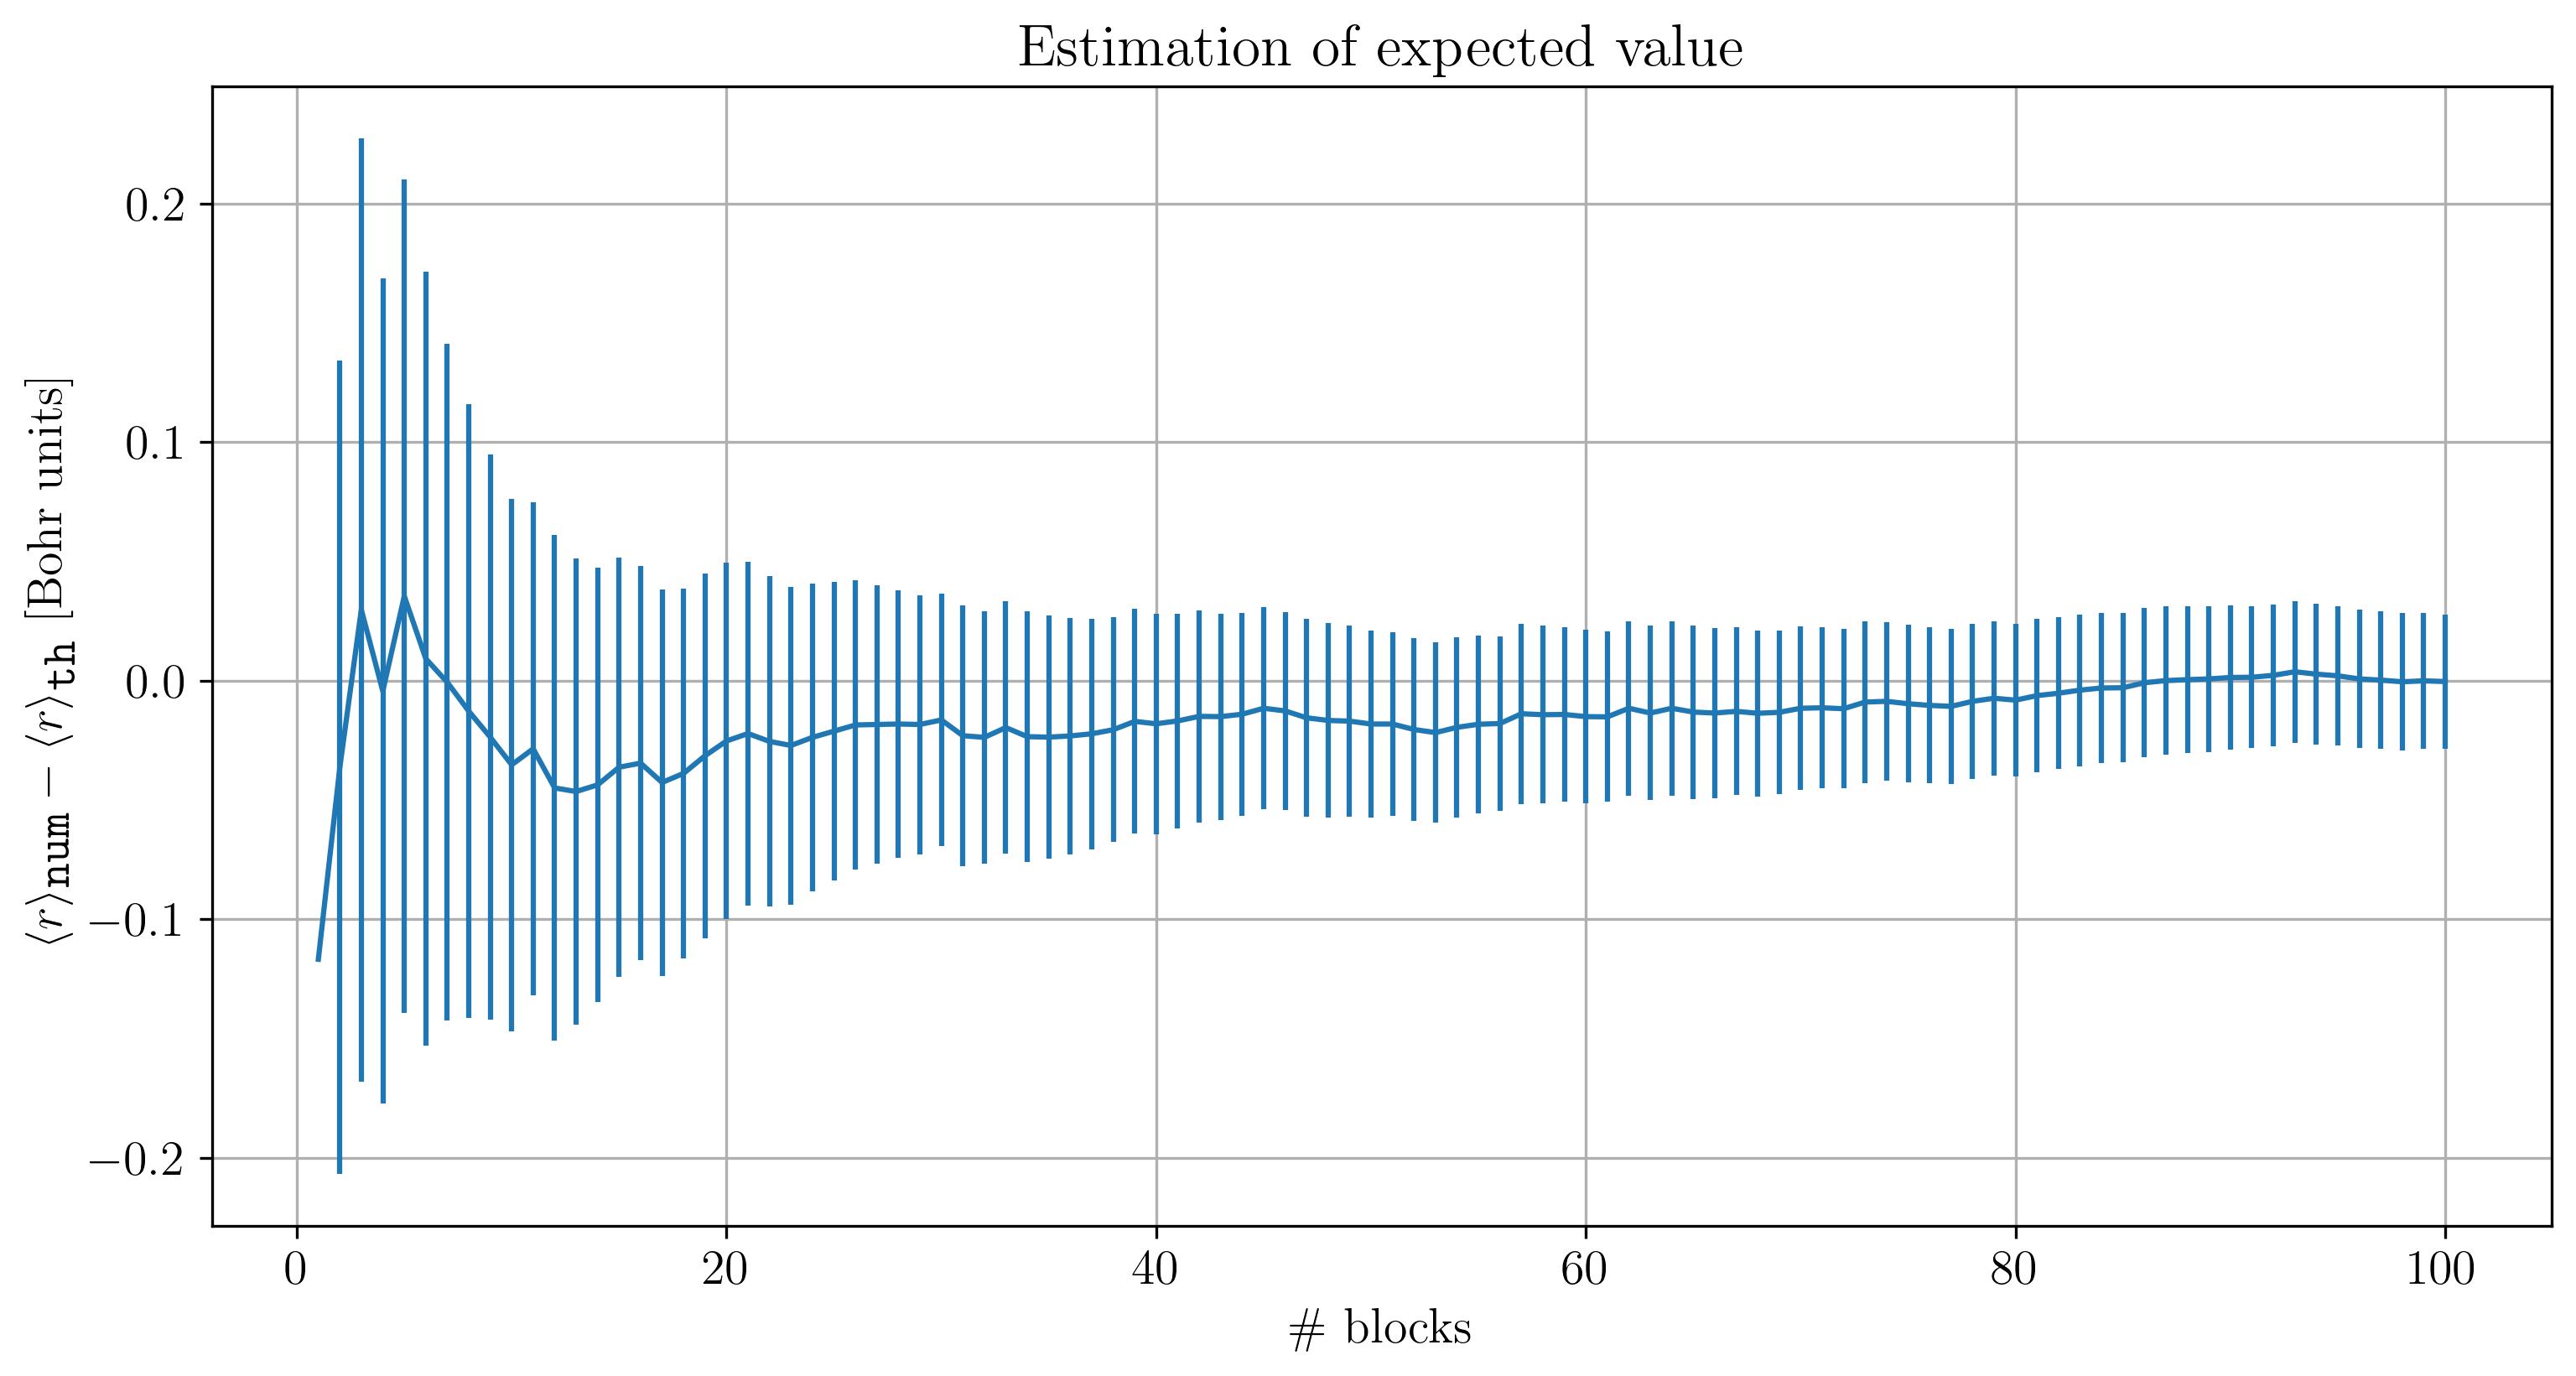

In [13]:
plt.subplots(1,1, figsize=(12,6), dpi=300)
x, f, err = np.loadtxt("./gaussian/210/data/gaussian210.dat", usecols=(0,1,2), unpack="true")
plt.errorbar(x,f-5, yerr=3*err)
plt.xlabel("\# blocks")
plt.ylabel("$\langle r \\rangle_{\\texttt{num}}  - \langle r\\rangle_{\\texttt{th}} $ [Bohr units]")
plt.title("Estimation of expected value")

plt.grid(True)
plt.show()

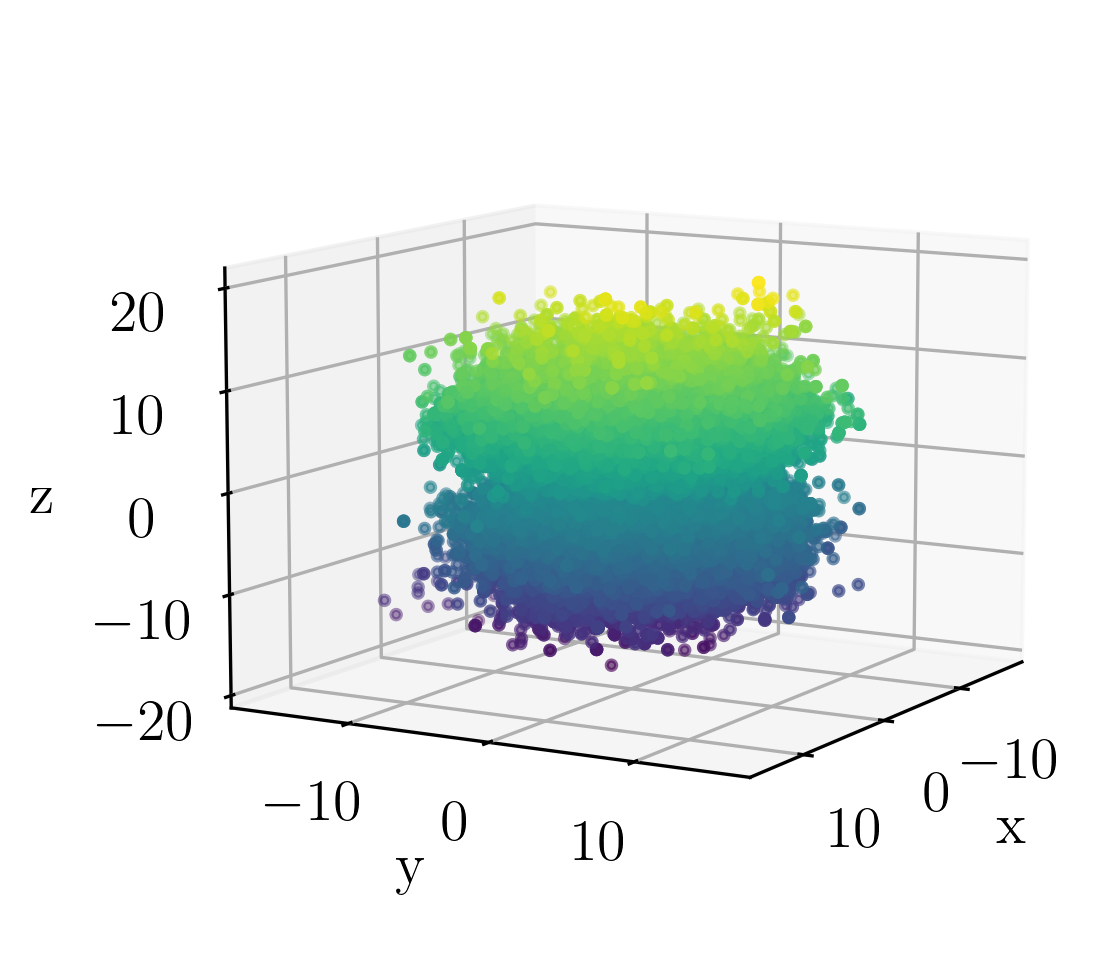

In [14]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
X, Y, Z = np.loadtxt("./gaussian/210/data/gaussian210.xyz", usecols=(0,1,2), unpack="true")
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()